In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings

filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
plt.rcParams['figure.figsize'] = [15,8]
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import recall_score, roc_auc_score, roc_curve,cohen_kappa_score

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
df = pd.read_csv('C:/Users/USER/Documents/Data set/DontGetKicked/training.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [12]:
df.shape

(72983, 34)

The Given data has **72983** Rows and **34** Columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


In [14]:
df.describe(include = np.object).T

,count,unique,top,freq
PurchDate,72983,517,11/23/2010,384
Auction,72983,3,MANHEIM,41043
Make,72983,33,CHEVROLET,17248
Model,72983,1063,PT CRUISER,2329
Trim,70623,134,Bas,13950
SubModel,72975,863,4D SEDAN,15236
Color,72975,16,SILVER,14875
Transmission,72974,3,AUTO,70398
WheelType,69809,3,Alloy,36050
Nationality,72978,4,AMERICAN,61028


In [15]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [16]:
df['IsBadBuy'] = df['IsBadBuy'].astype(np.object)

The following features have a wrong data type: 
- **IsBadBuy** is labeled as int64 but have been changed to category.                            
- **PurchDate** is labeled as object but have to be changed to DateTime
- **WheelTypeID** is labeled as float64 but have to be changed to category
- **BYRNO** is labeled int64 as category
- **VNZIP1** is labeled int64 as category                          
- **IsOnlineSale** is  labeled int64 as category

In [17]:
df['IsBadBuy'].value_counts(normalize = True)

0    0.877012
1    0.122988
Name: IsBadBuy, dtype: float64

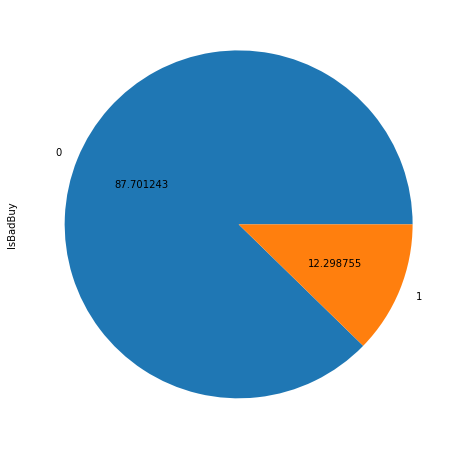

In [18]:
df['IsBadBuy'].value_counts().plot(kind = 'pie',autopct = '%0f');

In [19]:
df['IsOnlineSale'] = df['IsOnlineSale'].astype(np.object)

In [20]:
df_cat_cols = [ 'Auction',  'Make', 'Model',
                'Trim', 'Color','Transmission', 
                'WheelTypeID','WheelType','Nationality', 
                'Size','TopThreeAmericanName','PRIMEUNIT', 
                'AUCGUART','BYRNO', 'VNZIP1', 'VNST',
                'IsOnlineSale','SubModel']
for i in df_cat_cols:
    print(i)
    print('unique: ', df[i].unique())
    print('unique sum: ', len(df[i].unique()))
    print("\n")


Auction
unique:  ['ADESA' 'OTHER' 'MANHEIM']
unique sum:  3


Make
unique:  ['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER']
unique sum:  33


Model
unique:  ['MAZDA3' '1500 RAM PICKUP 2WD' 'STRATUS V6' ... 'EXCURSION 4WD V8 5.4'
 'M45 4.5L V8 MPI / SF' 'PATRIOT 2WD 4C 2.0L']
unique sum:  1063


Trim
unique:  ['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' nan 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg'
 'ZTW' 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC'
 'GTP' 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE'
 'DE' 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Va

**Model**, **Trim**, **SubModel**, **VNST**, **VINZIP1** have many unique values 

**Transmission** values 'MANUAL' and 'Manual' need to be merged

In [21]:
df.WheelType.value_counts(dropna=False)

Alloy      36050
Covers     33004
NaN         3174
Special      755
Name: WheelType, dtype: int64

In [22]:
df.WheelTypeID.value_counts(dropna=False)

1.0    36050
2.0    33004
NaN     3169
3.0      755
0.0        5
Name: WheelTypeID, dtype: int64

**The above both columns have the same data but in different format**


**Now Checking Each variabke with the other categorical variables to find out the relation.**

In [23]:
pd.crosstab(index=df['Nationality'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Nationality', ascending=False)

IsBadBuy,0,1
Nationality,,
TOP LINE ASIAN,0.865395,0.134605
OTHER ASIAN,0.867920,0.132080
OTHER,0.861538,0.138462
AMERICAN,0.878957,0.121043


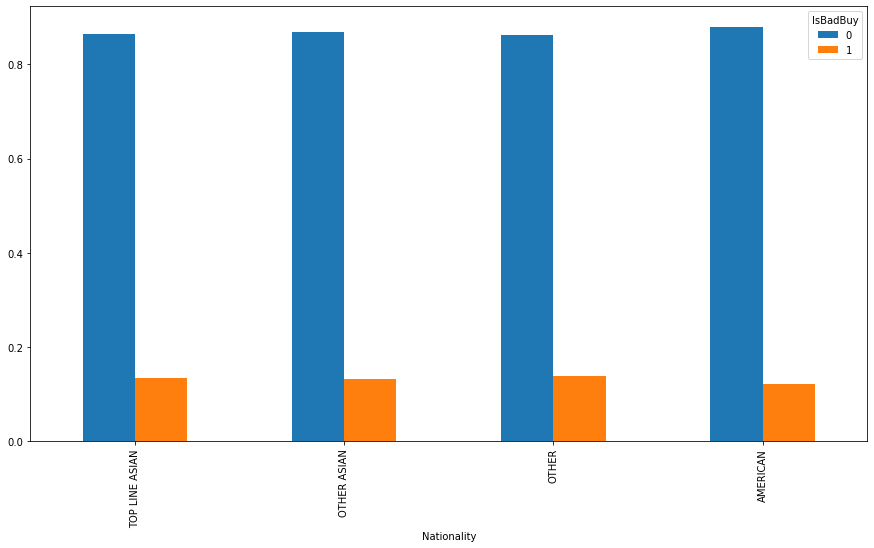

In [24]:
pd.crosstab(index=df['Nationality'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Nationality', ascending=False).plot(kind='bar');

In [25]:
pd.crosstab(index=df['Color'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Color', ascending=False)

IsBadBuy,0,1
Color,,
YELLOW,0.860656,0.139344
WHITE,0.875773,0.124227
SILVER,0.876101,0.123899
RED,0.868148,0.131852
PURPLE,0.849866,0.150134
OTHER,0.880165,0.119835
ORANGE,0.918072,0.081928
NOT AVAIL,0.744681,0.255319
MAROON,0.872923,0.127077


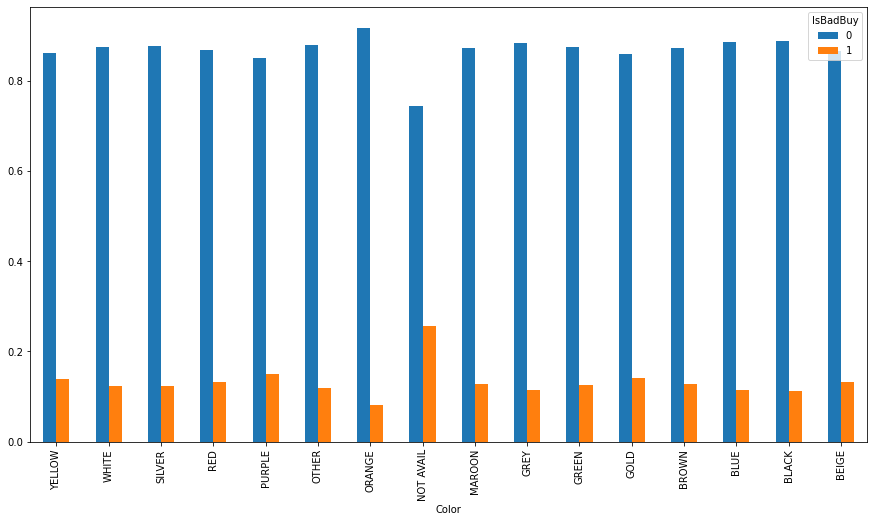

In [26]:
pd.crosstab(index=df['Color'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Color', ascending=False).plot(kind='bar');

In [27]:
pd.crosstab(index=df['Auction'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Auction', ascending=False)

IsBadBuy,0,1
Auction,,
OTHER,0.881835,0.118165
MANHEIM,0.885120,0.114880
ADESA,0.848120,0.151880


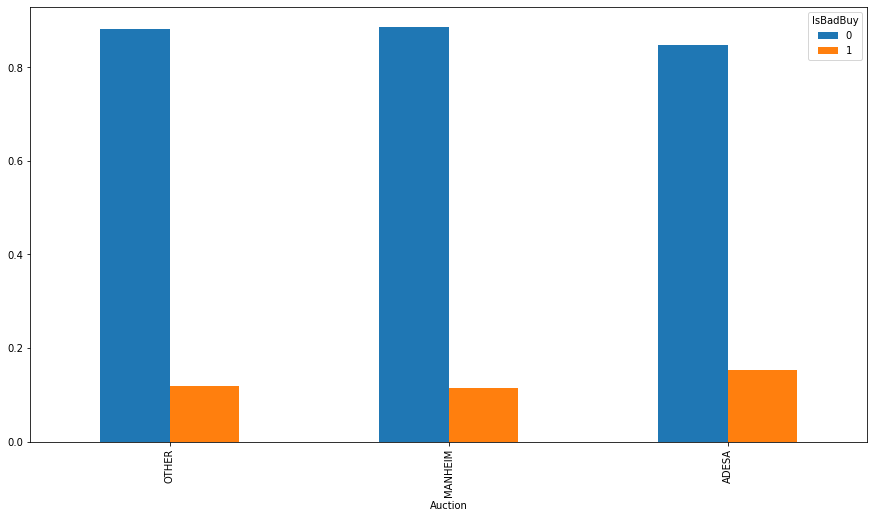

In [28]:
pd.crosstab(index=df['Auction'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Auction', ascending=False).plot(kind = 'bar');

In [29]:
pd.crosstab(index=df['TopThreeAmericanName'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='TopThreeAmericanName', ascending=False)

IsBadBuy,0,1
TopThreeAmericanName,,
OTHER,0.867029,0.132971
GM,0.891918,0.108082
FORD,0.843605,0.156395
CHRYSLER,0.883542,0.116458


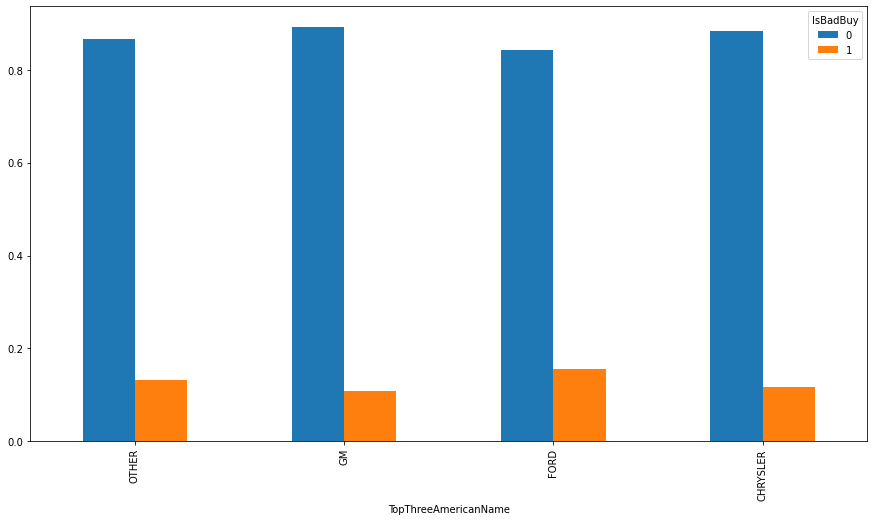

In [30]:
pd.crosstab(index=df['TopThreeAmericanName'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='TopThreeAmericanName', ascending=False).plot(kind = 'bar');

In [31]:
pd.crosstab(index=df['Size'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Size', ascending=False)

IsBadBuy,0,1
Size,,
VAN,0.872566,0.127434
SPORTS,0.814672,0.185328
SPECIALTY,0.908094,0.091906
SMALL TRUCK,0.855324,0.144676
SMALL SUV,0.862478,0.137522
MEDIUM SUV,0.852534,0.147466
MEDIUM,0.884976,0.115024
LARGE TRUCK,0.886435,0.113565
LARGE SUV,0.838102,0.161898


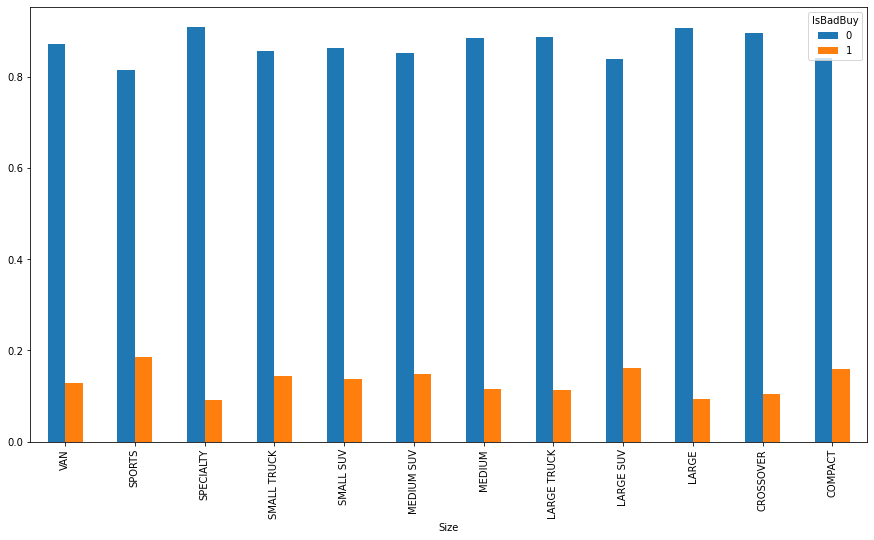

In [32]:
pd.crosstab(index=df['Size'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='Size', ascending=False).plot(kind = 'bar');

In [33]:
pd.crosstab(index=df['VNST'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='VNST', ascending=False)

IsBadBuy,0,1
VNST,,
WV,0.900685,0.099315
WA,0.941176,0.058824
VA,0.841757,0.158243
UT,0.878857,0.121143
TX,0.861945,0.138055
TN,0.884921,0.115079
SC,0.861215,0.138785
PA,0.826446,0.173554
OR,0.938389,0.061611


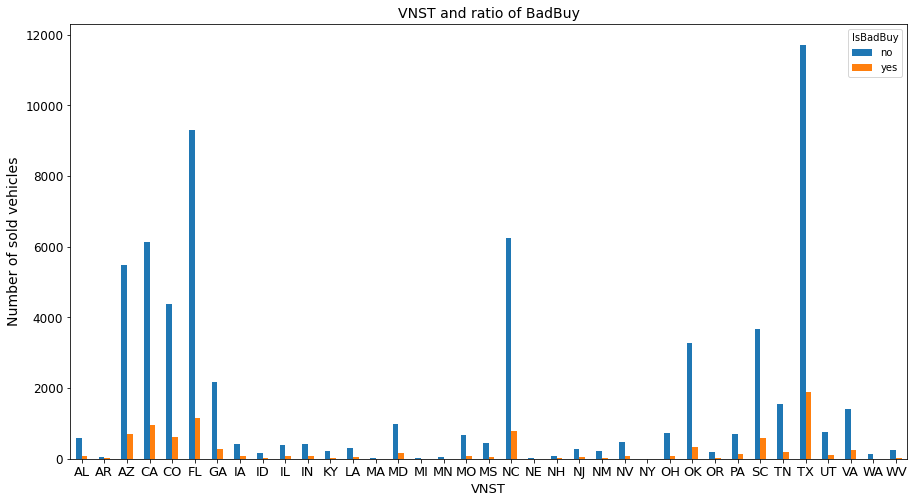

In [34]:
vehicle_age = pd.crosstab(index=df["VNST"], columns=df["IsBadBuy"])
vehicle_age.columns = ["no", "yes"]
vehicle_age.plot(kind='bar')
plt.title(label="VNST and ratio of BadBuy",size=14);
plt.xlabel(xlabel="VNST",size=13);
plt.ylabel(ylabel="Number of sold vehicles",size=14);
plt.legend(title="IsBadBuy",fontsize=10, facecolor="white")
plt.xticks(fontsize=13,rotation=0);
plt.yticks(fontsize=12);

In [35]:
pd.crosstab(index=df['VehicleAge'],columns=df['IsBadBuy'],normalize = 'index').sort_values(by='VehicleAge', ascending=False)

IsBadBuy,0,1
VehicleAge,,
9,0.687307,0.312693
8,0.731081,0.268919
7,0.783685,0.216315
6,0.819621,0.180379
5,0.853736,0.146264
4,0.890437,0.109563
3,0.918186,0.081814
2,0.936336,0.063664
1,0.959599,0.040401


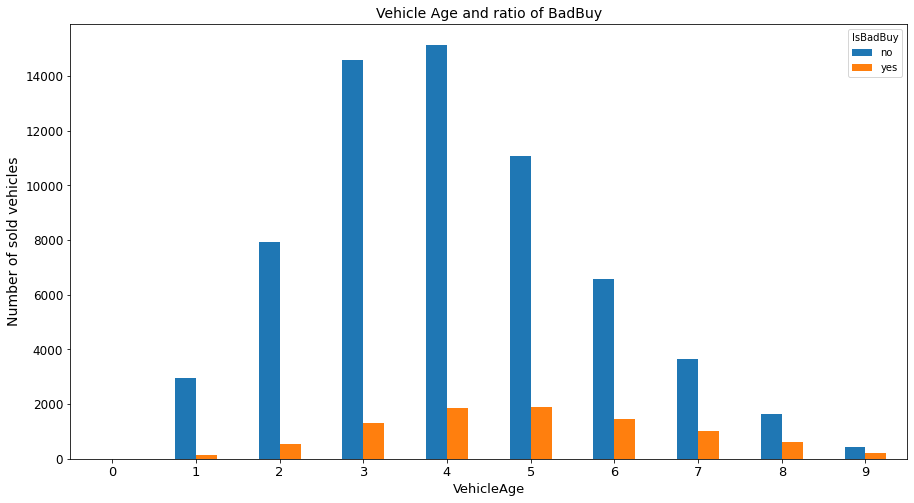

In [36]:
vehicle_age = pd.crosstab(index=df["VehicleAge"], columns=df["IsBadBuy"])
vehicle_age.columns = ["no", "yes"]
vehicle_age.plot(kind='bar')
plt.title(label="Vehicle Age and ratio of BadBuy",size=14);
plt.xlabel(xlabel="VehicleAge",size=13);
plt.ylabel(ylabel="Number of sold vehicles",size=14);
plt.legend(title="IsBadBuy",fontsize=10, facecolor="white")
plt.xticks(fontsize=13,rotation=0);
plt.yticks(fontsize=12);

**It can be observed that the cars with age greater than 3 and less than 7 has more defective Cars**

In [37]:
df[['VehYear','VehicleAge','PurchDate']].head()

,VehYear,VehicleAge,PurchDate
0,2006,3,12/7/2009
1,2004,5,12/7/2009
2,2005,4,12/7/2009
3,2004,5,12/7/2009
4,2005,4,12/7/2009


**VehYear**,**VehicleAge** and **PurchDate** all have the Same Information, so **VehYear** and **PurchDate** can be dropped from the datset

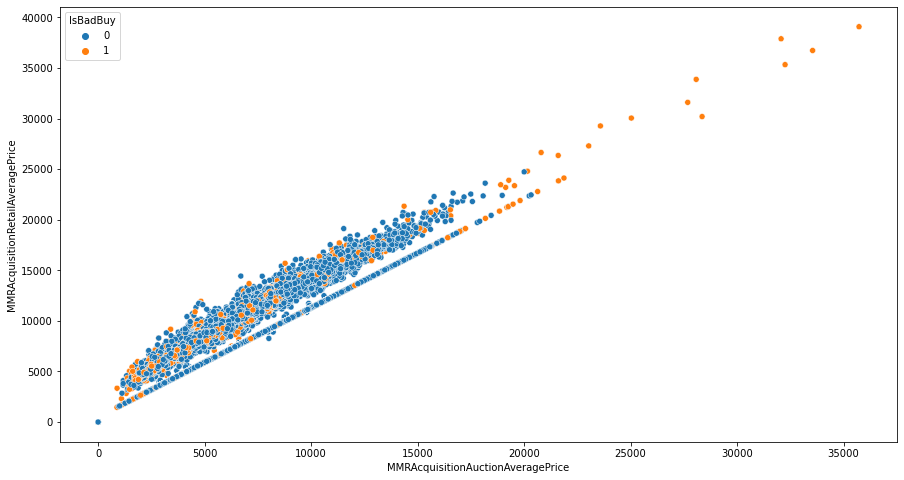

In [38]:
sns.scatterplot(x='MMRAcquisitionAuctionAveragePrice', 
                y='MMRAcquisitionRetailAveragePrice', data=df,  hue='IsBadBuy');

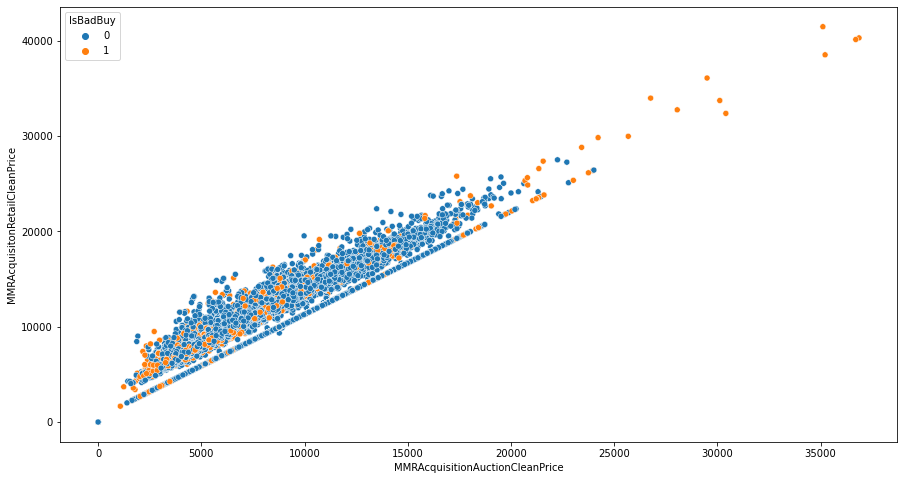

In [39]:
sns.scatterplot(x='MMRAcquisitionAuctionCleanPrice',
                y='MMRAcquisitonRetailCleanPrice', data=df,  hue='IsBadBuy');

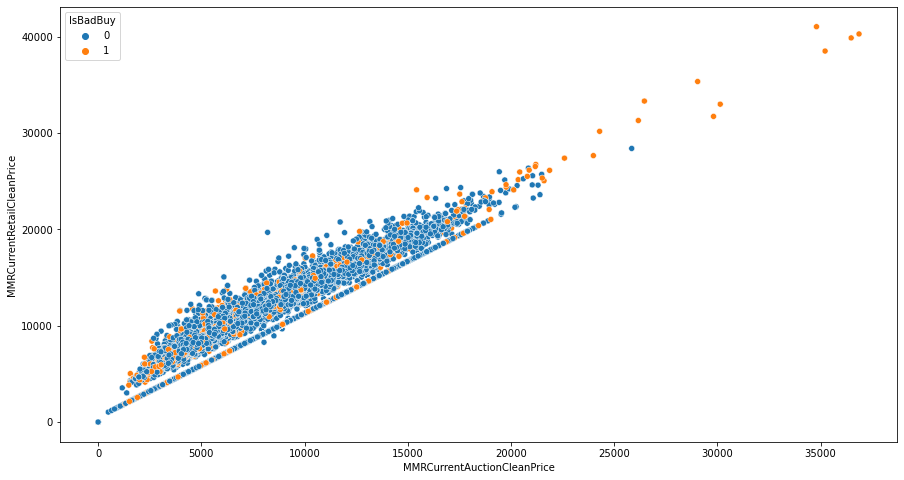

In [40]:
sns.scatterplot(x='MMRCurrentAuctionCleanPrice', 
                y='MMRCurrentRetailCleanPrice', data=df,  hue='IsBadBuy');

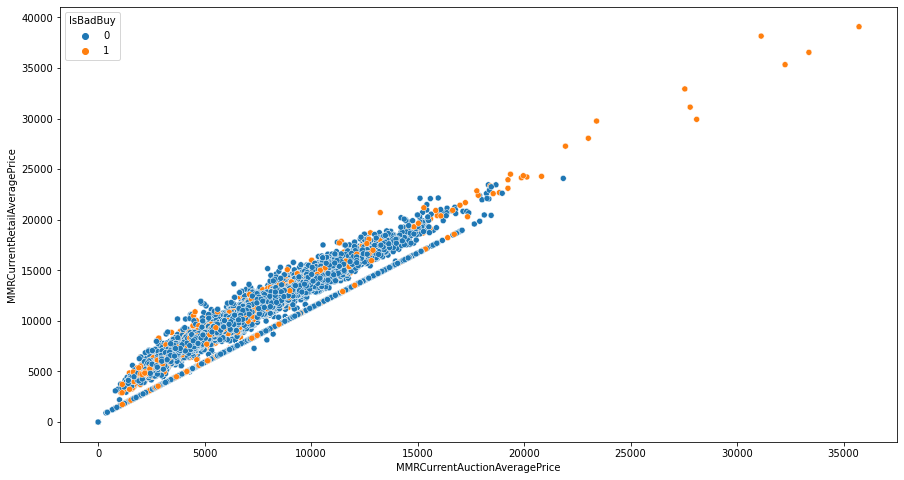

In [41]:
sns.scatterplot(x='MMRCurrentAuctionAveragePrice', 
                y='MMRCurrentRetailAveragePrice', data=df,  hue='IsBadBuy');


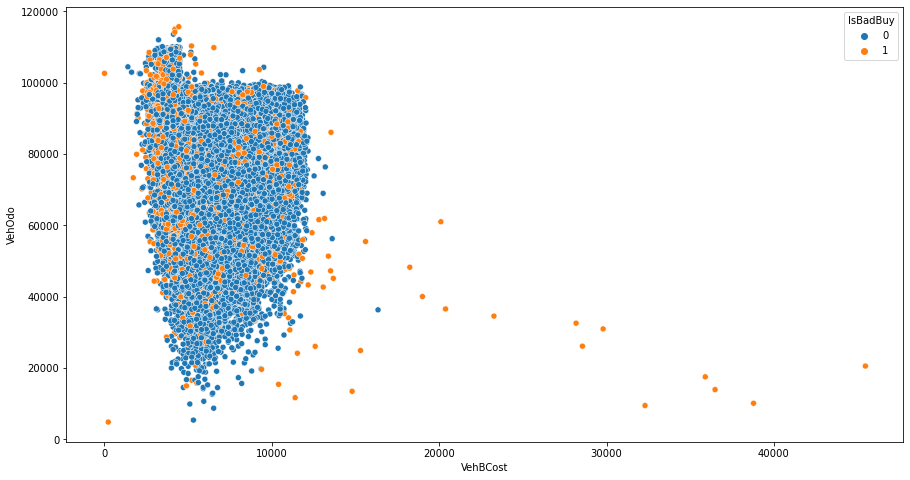

In [42]:
sns.scatterplot(x='VehBCost', y='VehOdo', data=df,  hue='IsBadBuy');

In [43]:
k = df.isnull().sum()

In [44]:
per_error = pd.DataFrame(columns = ('Variable','Percentage_error'))
l = len(k)
for i in range(0,l):
    if k[i] == 0:
        pass
    else:
        per_error = per_error.append({"Variable":k.index[i],'Percentage_error':(k[i]*100)/(df.shape[0])},ignore_index=True)
per_error.sort_values(by = 'Percentage_error',ascending = False,ignore_index = True)

,Variable,Percentage_error
0,AUCGUART,95.315347
1,PRIMEUNIT,95.315347
2,WheelType,4.348958
3,WheelTypeID,4.342107
4,Trim,3.233630
5,MMRCurrentAuctionAveragePrice,0.431607
6,MMRCurrentAuctionCleanPrice,0.431607
7,MMRCurrentRetailAveragePrice,0.431607
8,MMRCurrentRetailCleanPrice,0.431607
9,MMRAcquisitionAuctionCleanPrice,0.024663


Over 95% Null Values are found in **AUCGUART** and **PRIMEUNIT** so these can be dropped

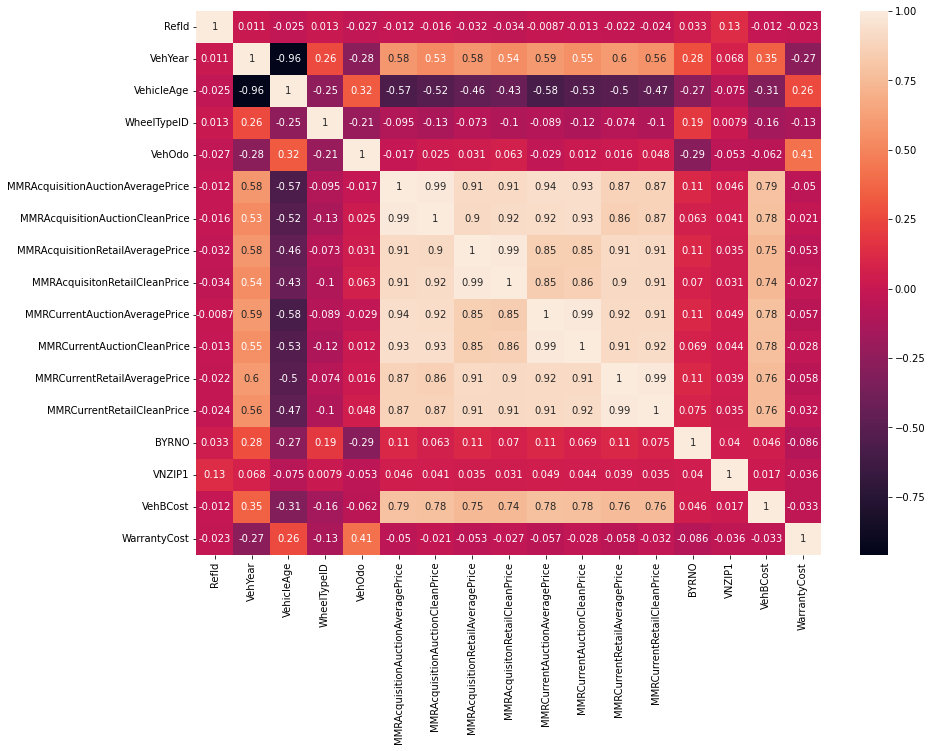

In [45]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True);

**MMRA - Values** are highly correlated among themselves also they are highly correlated with **VehBCost**

In [46]:
df['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

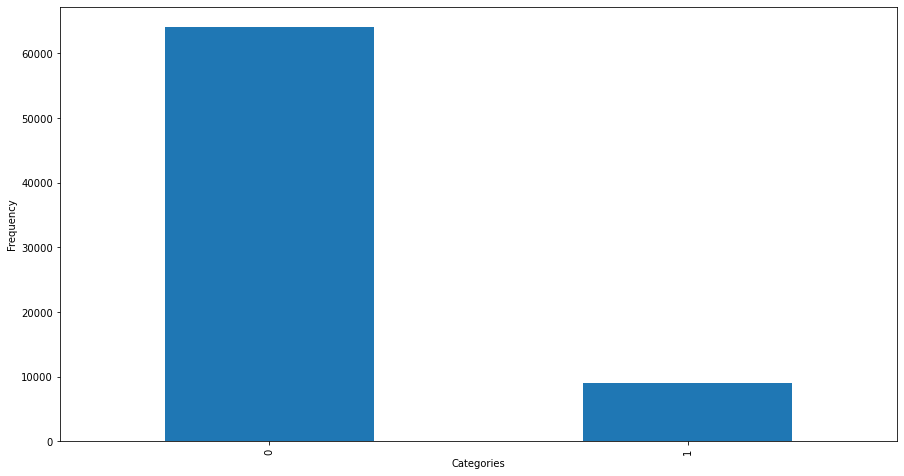

In [47]:
l = df['IsBadBuy'].value_counts()
l.plot(kind = 'bar')
plt.xlabel('Categories')
plt.ylabel("Frequency");

In [48]:
skew = pd.DataFrame(columns = ('Varible','skewness'))
for i in df.select_dtypes(np.number):
    skew = skew.append({"Varible":i,'skewness':df[i].skew()},ignore_index=True)

In [49]:
skew.sort_values(by = 'skewness',ascending = False,ignore_index = True)

,Varible,skewness
0,BYRNO,2.129225
1,WarrantyCost,2.070831
2,VehBCost,0.715931
3,MMRCurrentAuctionCleanPrice,0.535525
4,MMRCurrentAuctionAveragePrice,0.522583
5,MMRAcquisitionAuctionCleanPrice,0.466501
6,MMRAcquisitionAuctionAveragePrice,0.463641
7,VehicleAge,0.393616
8,WheelTypeID,0.250269
9,MMRAcquisitionRetailAveragePrice,0.209214


In [50]:
df.select_dtypes(np.number).columns

Index(['RefId', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'WarrantyCost'],
      dtype='object')

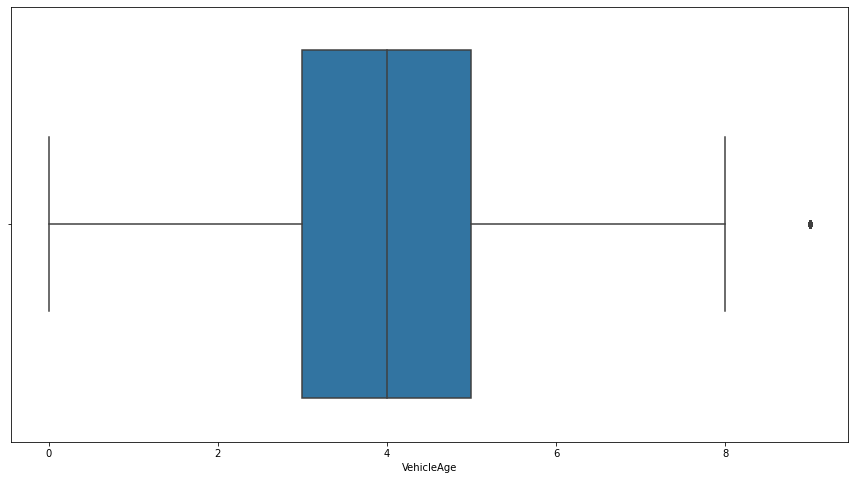

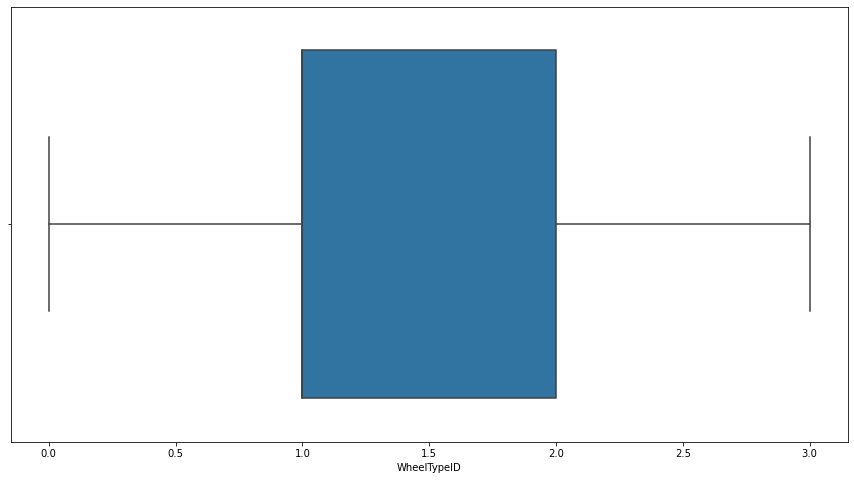

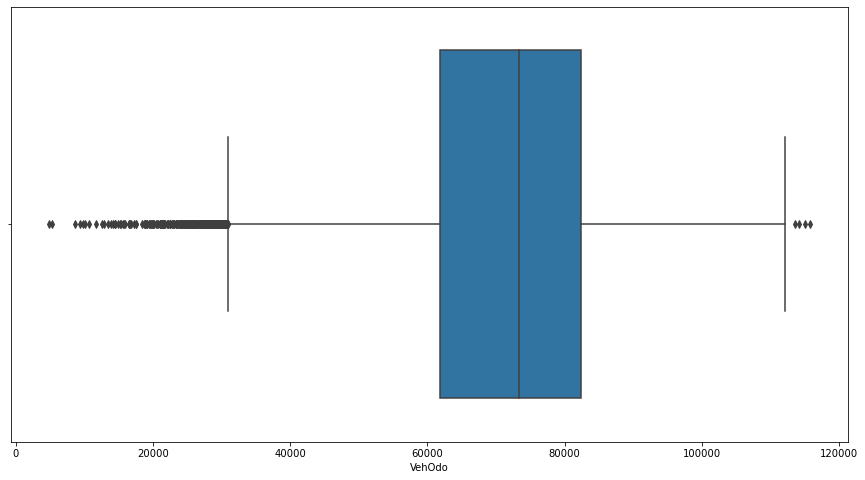

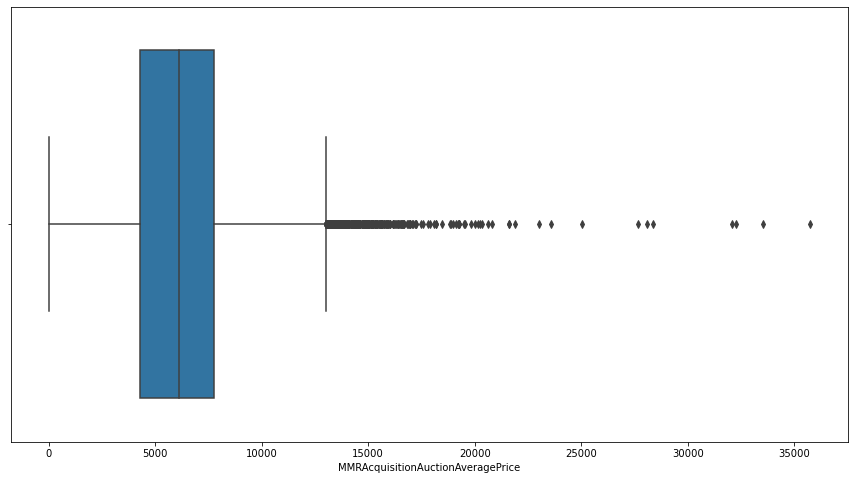

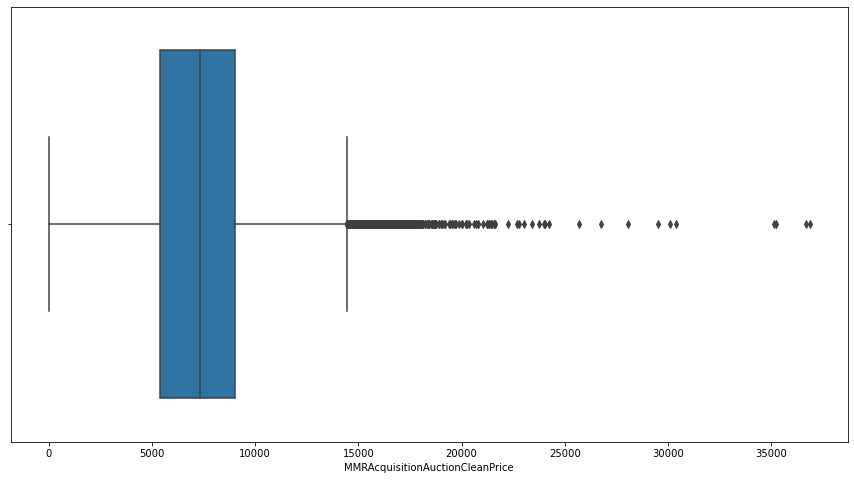

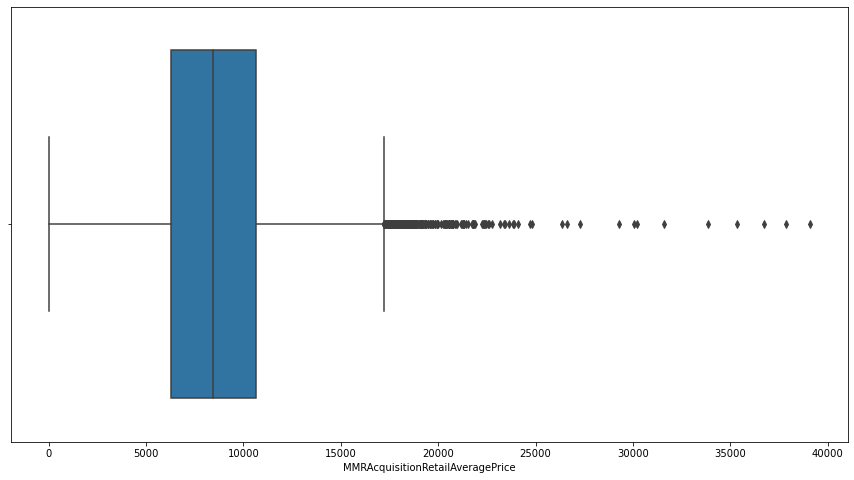

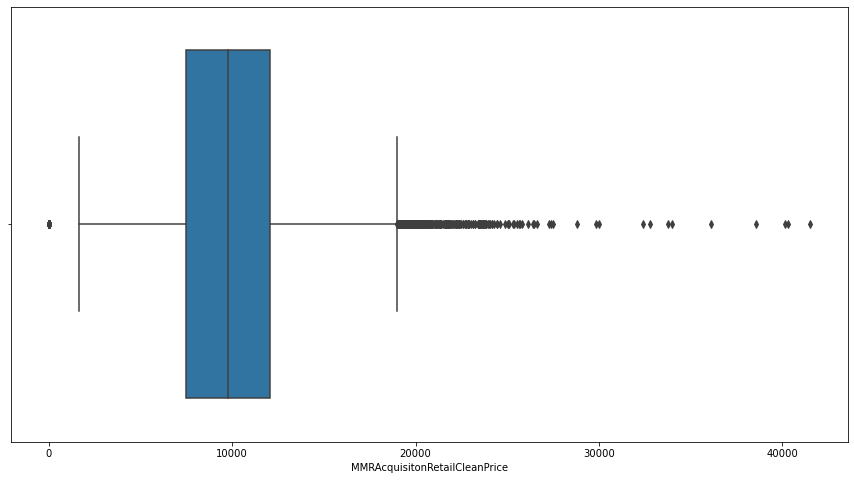

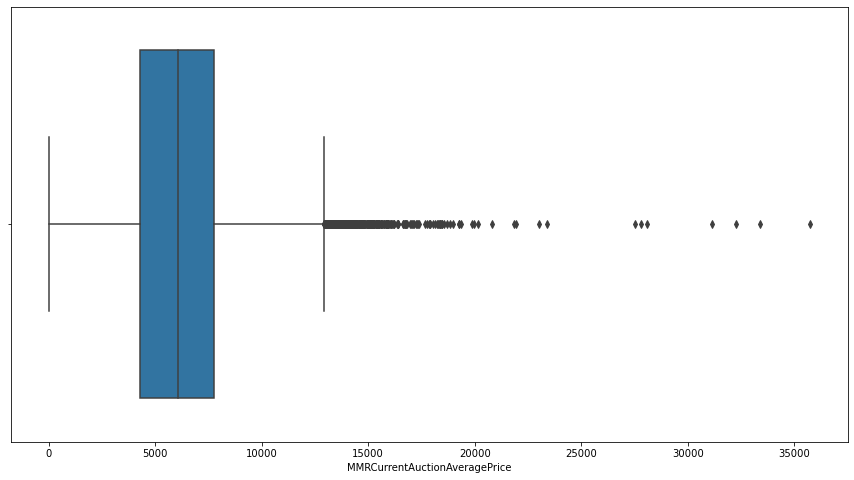

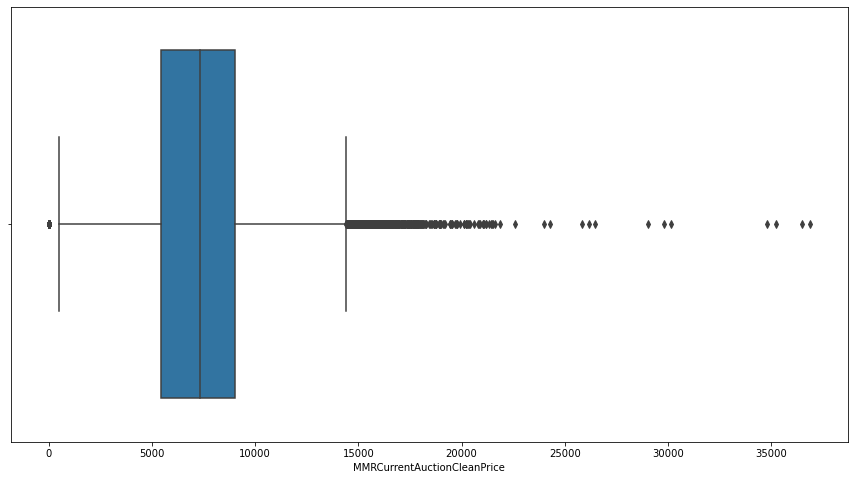

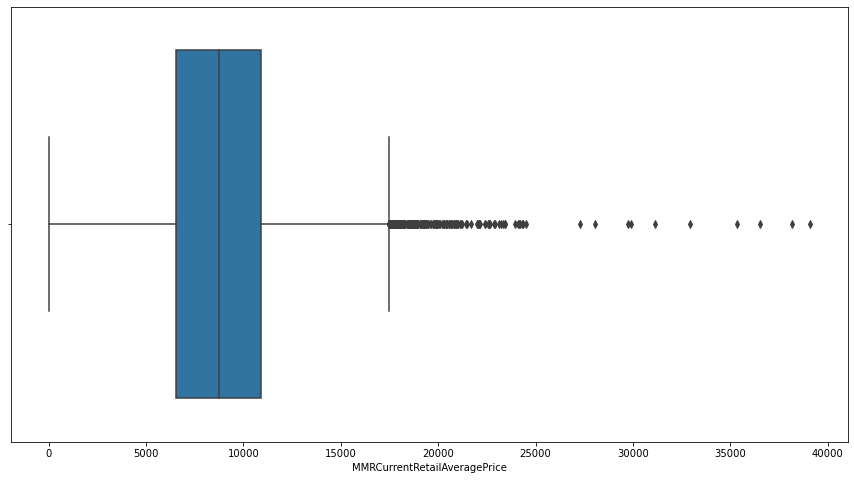

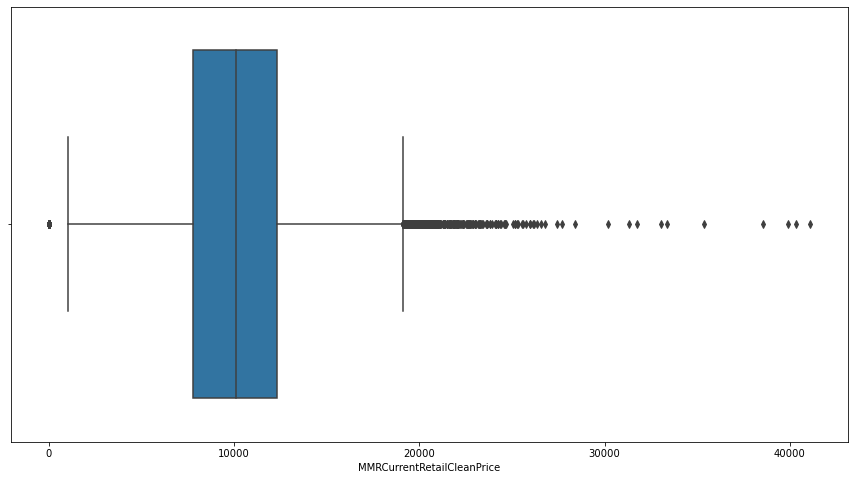

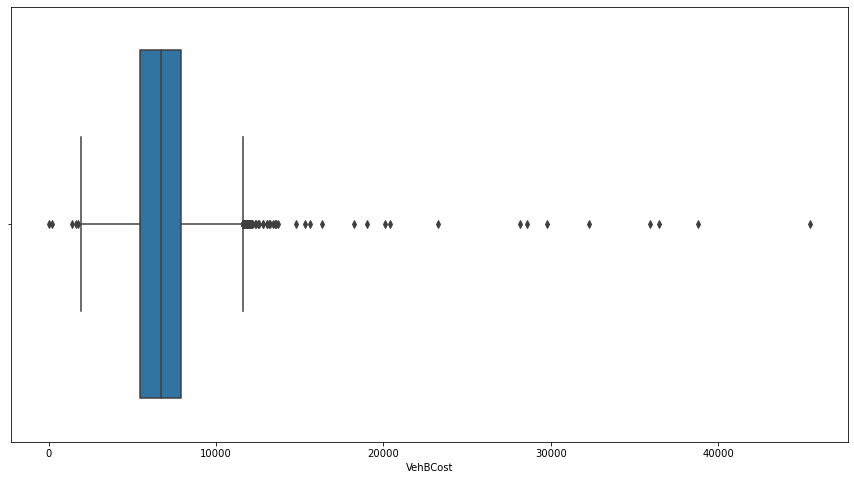

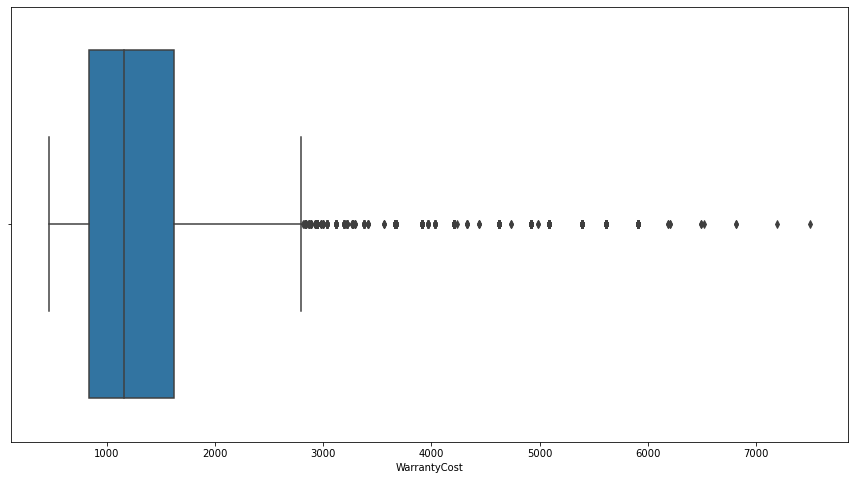

In [51]:
df_num = ['VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','VehBCost', 'WarrantyCost']
for i in df_num:
    sns.boxplot(df[i])
    plt.show()

- **Model**, **Submodel** and **Trim** have too many expressions that need to converted with encoding which is difficult for machine learning. 

- **WheelTyp** and **WheelTypID** are identical, where WheelTyp have more information about the type of tires whereas WheelTypeID has only numbers.

- **VehYear**,**PurchDate** and **VehicleAge** have a relationship. It is required to know how old the car is, therefore VehYear and PurchDate can be dropped from the data.

- **VNZIP**,**VNST** Zipcode and state where car has been purchased. Have too many expressions that need to converted with encoding which is difficult for machine learning.

- **BYRNO**,**RefId**, Number assigned to the buyer that purchased the car and reference id of transaction, can be dropped 

- **VehBCost**, One car has the pirce of 1 need to be imputed 

- **MMRA-Features**, **VehBCost** are highly correlated

- **PRIMEUNIT**, **AUCGUART** have more than 95% null values.


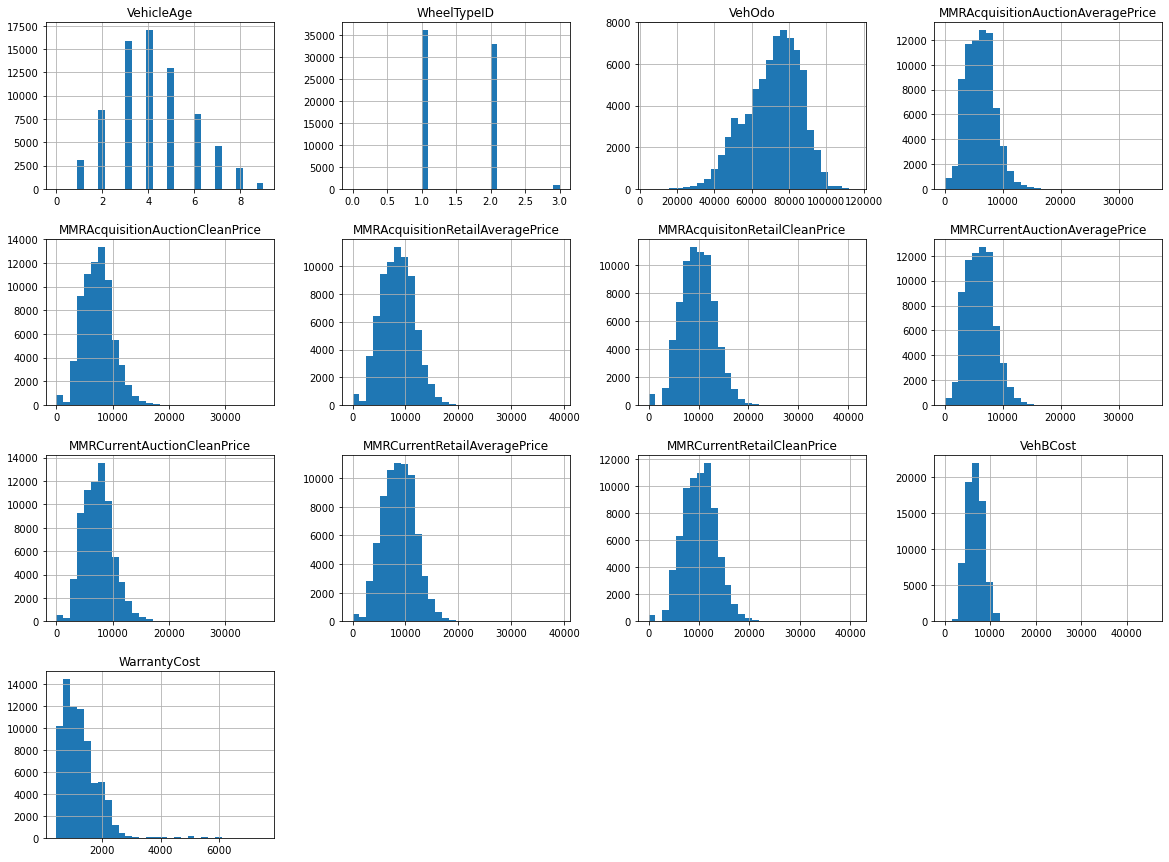

In [52]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.drop(['RefId','VehYear','BYRNO','VNZIP1'])
df[numerical_features].hist(figsize=(20, 15), bins=30);

In [53]:
df_m = df.copy()

In [54]:
df_m.drop(['VehYear','PurchDate','WheelTypeID','BYRNO','VNZIP1',
           'Model','SubModel','Trim', 'RefId','PRIMEUNIT', 'AUCGUART'],axis=1,inplace = True)

In [55]:
df_m.shape

(72983, 23)

In [56]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0
MMRCurrentAuctionAveragePrice,72668.0,6132.081287,2434.567723,0.0,4275.0,6062.0,7736.0,35722.0
MMRCurrentAuctionCleanPrice,72668.0,7390.681827,2686.248852,0.0,5414.0,7313.0,9013.0,36859.0
MMRCurrentRetailAveragePrice,72668.0,8775.723331,3090.702941,0.0,6536.0,8729.0,10911.0,39080.0
MMRCurrentRetailCleanPrice,72668.0,10145.385314,3310.254351,0.0,7784.0,10103.0,12309.0,41062.0


In [57]:
df_m.describe(include = np.object).T

,count,unique,top,freq
IsBadBuy,72983,2,0,64007
Auction,72983,3,MANHEIM,41043
Make,72983,33,CHEVROLET,17248
Color,72975,16,SILVER,14875
Transmission,72974,3,AUTO,70398
WheelType,69809,3,Alloy,36050
Nationality,72978,4,AMERICAN,61028
Size,72978,12,MEDIUM,30785
TopThreeAmericanName,72978,4,GM,25314
VNST,72983,37,TX,13596


We are orgainsing different states of USA into zones instead of dropping the column VNST to get more insights of the data.

In [58]:
Mid_west = ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']
North_east = ['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT']
South_east = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN']
South_west = ['AZ','NM','OK','TX','VA','WV']
West = ['AK','CA','CO','HI','ID','MT','NV','OR','UT','WA','WY']

![US%20disisions.png](attachment:US%20disisions.png)

The above mentioned Data has been obtained from a US postal Data 

In [59]:
k = list(df_m['VNST'].unique())

In [60]:
for i in k:
    if i in Mid_west:
        df_m['VNST'].replace(i,'Mid_west',inplace = True)
    if i in West:
        df_m['VNST'].replace(i,'West',inplace = True)
    if i in North_east:
        df_m['VNST'].replace(i,'North_east',inplace = True)
    if i in South_east:
        df_m['VNST'].replace(i,'South_east',inplace = True)
    if i in South_west:
        df_m['VNST'].replace(i,'South_west',inplace = True)

In [61]:
df_m['VNST'].value_counts()

South_east    27815
South_west    25557
West          14073
Mid_west       3098
North_east     2440
Name: VNST, dtype: int64

In [62]:
df_m.rename(columns = {'VNST':'Zone'},inplace = True)

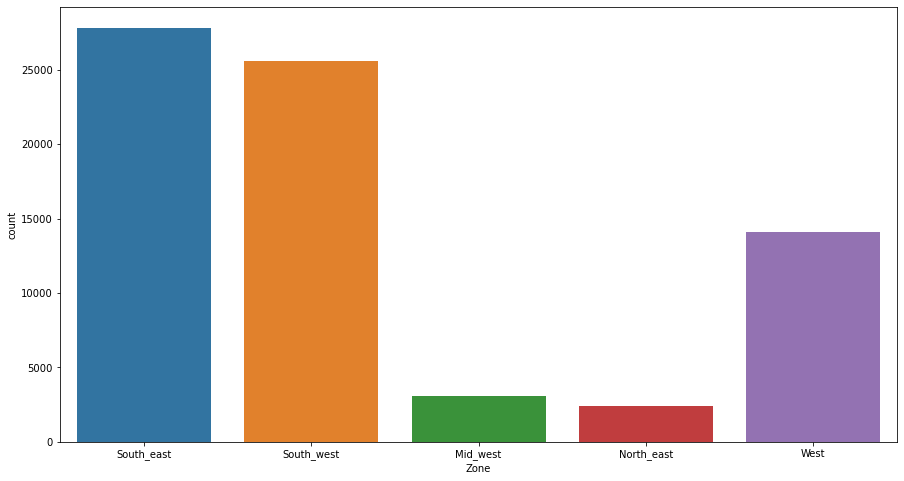

In [63]:
sns.countplot(df_m['Zone']);

It can be observed that the most of the vehicle can be found from South_East zone has more counts followed by South_west and West

In [64]:
pd.crosstab(index=df_m['Zone'],columns=df_m['IsBadBuy'],normalize = 'index').sort_values(by='Zone', ascending=False)

IsBadBuy,0,1
Zone,,
West,0.872735,0.127265
South_west,0.873498,0.126502
South_east,0.883948,0.116052
North_east,0.851230,0.148770
Mid_west,0.883473,0.116527


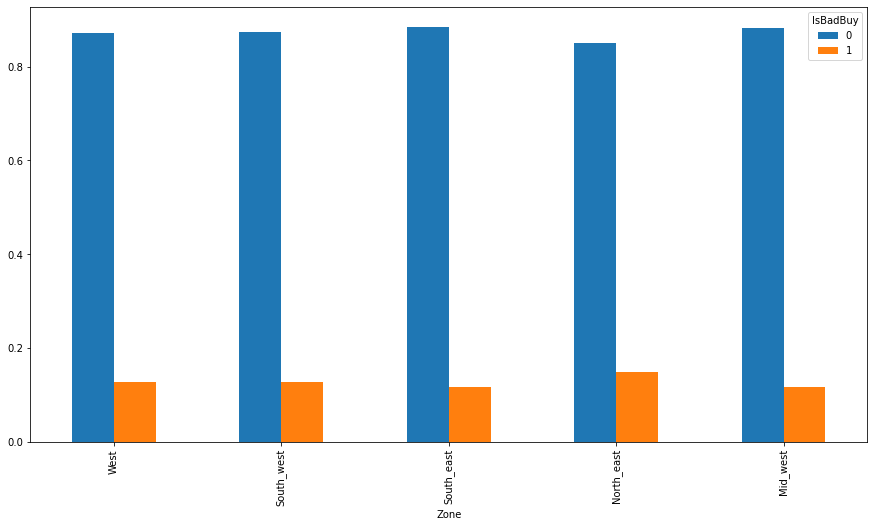

In [65]:
pd.crosstab(index=df_m['Zone'],columns=df_m['IsBadBuy'],normalize = 'index').sort_values(by='Zone', ascending=False).plot(kind = 'bar');

In [66]:
df_m

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,Zone,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,South_east,7100.0,0,1113
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,South_east,7600.0,0,1053
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,South_east,4900.0,0,1389
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,South_east,4100.0,0,630
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,South_east,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,BLACK,AUTO,Alloy,45234,AMERICAN,MEDIUM,...,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,South_east,4200.0,0,993
72979,0,ADESA,2,CHEVROLET,SILVER,AUTO,NaN,71759,AMERICAN,MEDIUM,...,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,South_east,6200.0,0,1038
72980,0,ADESA,4,JEEP,SILVER,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,...,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,South_east,8200.0,0,1893
72981,0,ADESA,3,CHEVROLET,WHITE,AUTO,Alloy,79554,AMERICAN,LARGE,...,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,South_east,7000.0,0,1974


# Missing Value imputation for numerical values

In [67]:
col = df_m.select_dtypes(np.number).columns

In [68]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df_m[col])
df_m[col]=imputer.transform(df_m[col])

Median imputaion is done on the numerical data so that we need not worry about outlier treatement which is planned for future work

In [69]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72983.0,6128.901347,2461.689193,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72983.0,7373.618610,2722.156458,0.0,5407.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72983.0,8497.021252,3155.896142,0.0,6281.0,8444.0,10650.0,39080.0
MMRAcquisitonRetailCleanPrice,72983.0,9850.912966,3385.372126,0.0,7494.0,9789.0,12088.0,41482.0
MMRCurrentAuctionAveragePrice,72983.0,6131.778812,2429.312427,0.0,4285.0,6062.0,7732.0,35722.0
MMRCurrentAuctionCleanPrice,72983.0,7390.346546,2680.450317,0.0,5425.0,7313.0,9006.0,36859.0
MMRCurrentRetailAveragePrice,72983.0,8775.521669,3084.027307,0.0,6550.0,8729.0,10897.0,39080.0
MMRCurrentRetailCleanPrice,72983.0,10145.202376,3303.104046,0.0,7796.0,10103.0,12308.0,41062.0


In [70]:
cat = df_m.select_dtypes(np.object).columns

In [71]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(df_m[cat])
df_m[cat]=imputer.transform(df_m[cat])

Here Mode imputation has been done

In [72]:
df_m.describe(include = np.object).T

,count,unique,top,freq
IsBadBuy,72983,2,0,64007
Auction,72983,3,MANHEIM,41043
Make,72983,33,CHEVROLET,17248
Color,72983,16,SILVER,14883
Transmission,72983,3,AUTO,70407
WheelType,72983,3,Alloy,39224
Nationality,72983,4,AMERICAN,61033
Size,72983,12,MEDIUM,30790
TopThreeAmericanName,72983,4,GM,25319
Zone,72983,5,South_east,27815


In [73]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  object 
 1   Auction                            72983 non-null  object 
 2   VehicleAge                         72983 non-null  float64
 3   Make                               72983 non-null  object 
 4   Color                              72983 non-null  object 
 5   Transmission                       72983 non-null  object 
 6   WheelType                          72983 non-null  object 
 7   VehOdo                             72983 non-null  float64
 8   Nationality                        72983 non-null  object 
 9   Size                               72983 non-null  object 
 10  TopThreeAmericanName               72983 non-null  object 
 11  MMRAcquisitionAuctionAveragePrice  72983 non-null  flo

In [74]:
Cat_col = pd.get_dummies(df_m[cat],drop_first = True) # Sklearn.feature selection--- variance_threshold

In [75]:
Cat_col

,IsBadBuy_1,Auction_MANHEIM,Auction_OTHER,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,Zone_North_east,Zone_South_east,Zone_South_west,Zone_West,IsOnlineSale_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
72979,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
72980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
72981,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [76]:
Num_col = df_m.select_dtypes(np.number)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(Num_col)
Num_scaled=scaler.transform(Num_col)

MinMaxScaler has been used to scale the data.

In [78]:
Num_feat = pd.DataFrame(Num_scaled,columns = Num_col.columns)

In [79]:
Num_feat

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
0,0.333333,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,0.296750,0.302202,0.156132,0.092524
1,0.555556,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,0.291044,0.311505,0.167129,0.083997
2,0.444444,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,0.182856,0.211923,0.107746,0.131751
3,0.555556,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,0.111950,0.134382,0.090151,0.023877
4,0.444444,0.582026,0.109540,0.137117,0.197620,0.209898,0.090896,0.118940,0.172441,0.192660,0.087952,0.079306
...,...,...,...,...,...,...,...,...,...,...,...,...
72978,0.888889,0.364400,0.055876,0.081201,0.067963,0.089967,0.061307,0.082883,0.123746,0.144586,0.092351,0.075469
72979,0.222222,0.603596,0.179665,0.198730,0.190148,0.202763,0.189939,0.220625,0.259749,0.283766,0.136338,0.081865
72980,0.444444,0.754563,0.239208,0.270192,0.248951,0.271347,0.234449,0.265932,0.302738,0.350738,0.180325,0.203383
72981,0.333333,0.673890,0.179721,0.206300,0.190225,0.210019,0.184480,0.208470,0.258419,0.273440,0.153932,0.214895


In [80]:
from scipy.stats import shapiro
for i in Num_feat.columns:
  print('Stat and p-value for',i,'is',shapiro(Num_feat[i]))

Stat and p-value for VehicleAge is ShapiroResult(statistic=0.9563164114952087, pvalue=0.0)
Stat and p-value for VehOdo is ShapiroResult(statistic=0.9820109605789185, pvalue=0.0)
Stat and p-value for MMRAcquisitionAuctionAveragePrice is ShapiroResult(statistic=0.9839088320732117, pvalue=0.0)
Stat and p-value for MMRAcquisitionAuctionCleanPrice is ShapiroResult(statistic=0.9833253622055054, pvalue=0.0)
Stat and p-value for MMRAcquisitionRetailAveragePrice is ShapiroResult(statistic=0.9932205080986023, pvalue=0.0)
Stat and p-value for MMRAcquisitonRetailCleanPrice is ShapiroResult(statistic=0.9920430779457092, pvalue=0.0)
Stat and p-value for MMRCurrentAuctionAveragePrice is ShapiroResult(statistic=0.9820910692214966, pvalue=0.0)
Stat and p-value for MMRCurrentAuctionCleanPrice is ShapiroResult(statistic=0.9819521903991699, pvalue=0.0)
Stat and p-value for MMRCurrentRetailAveragePrice is ShapiroResult(statistic=0.9939961433410645, pvalue=2.382207389352189e-44)
Stat and p-value for MMRCurr

In [81]:
import scipy.stats as stats
Utest_results = []
for i in Num_col.columns:
  u_value,p = stats.mannwhitneyu(x=Cat_col['IsBadBuy_1'], y=Num_col[i], alternative = 'two-sided')
  Utest_results.append([i, u_value, p])

columns = ['feature', 'Utest-statistic', 'p-value']
Utest_df = pd.DataFrame(Utest_results, columns=columns)
Utest_df = Utest_df.sort_values('p-value').set_index('feature')
Utest_df


,Utest-statistic,p-value
feature,,
VehicleAge,13967831.0,0.0
VehOdo,0.0,0.0
MMRAcquisitionAuctionAveragePrice,33931026.0,0.0
MMRAcquisitionAuctionCleanPrice,29150639.5,0.0
MMRAcquisitionRetailAveragePrice,33931026.0,0.0
MMRAcquisitonRetailCleanPrice,33931026.0,0.0
MMRCurrentAuctionAveragePrice,20653668.0,0.0
MMRCurrentAuctionCleanPrice,16055739.0,0.0
MMRCurrentRetailAveragePrice,20653668.0,0.0


In [82]:
threshold = 0.05
signi_Utest = Utest_df[Utest_df['p-value'] < threshold]

print("Features with significant MannWhitneyTest p-value: {}".format(signi_Utest.shape[0]))
print("Features with insignificant MannWhitneyTest p-value: {}".format(Utest_df.shape[0] - signi_Utest.shape[0]))

Features with significant MannWhitneyTest p-value: 12
Features with insignificant MannWhitneyTest p-value: 0


In [83]:
from scipy.stats import chi2,chi2_contingency
chi_sq = pd.DataFrame(columns = ['Variable','P-Value'])
for i in df_m.select_dtypes(np.object):
    dataset_table = pd.crosstab(df_m[i],df_m['IsBadBuy'])
    observed = dataset_table.values
    val2 = stats.chi2_contingency(dataset_table)
    expected = val2[3]
    chi_square = sum([(o-e)**2./e for o,e in zip(observed,expected)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=3)
    chi_sq = chi_sq.append({'Variable':i,'P-Value':p_value},ignore_index = True)
chi_sq

,Variable,P-Value
0,IsBadBuy,0.000000e+00
1,Auction,0.000000e+00
2,Make,0.000000e+00
3,Color,3.619327e-14
4,Transmission,7.269705e-01
5,WheelType,0.000000e+00
6,Nationality,3.829918e-03
7,Size,0.000000e+00
8,TopThreeAmericanName,0.000000e+00
9,Zone,2.027562e-07


In [84]:
threshold = 0.05
signi_chi = chi_sq[chi_sq['P-Value'] < threshold]

print("Features with significant Chi_sq p-value: {}".format(signi_chi.shape[0]))
print("Features with insignificant Chi_sq p-value: {}".format(chi_sq.shape[0] - signi_chi.shape[0]))

Features with significant Chi_sq p-value: 9
Features with insignificant Chi_sq p-value: 2


In [85]:
# The insignificant variables are IsSaleOnline and transmission

In [86]:
data_m = pd.concat([Num_feat,Cat_col],axis=1)

In [87]:
data_m

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,Zone_North_east,Zone_South_east,Zone_South_west,Zone_West,IsOnlineSale_1
0,0.333333,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,0.296750,0.302202,...,0,0,0,0,1,0,1,0,0,0
1,0.555556,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,0.291044,0.311505,...,0,0,0,0,0,0,1,0,0,0
2,0.444444,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,0.182856,0.211923,...,0,0,0,0,0,0,1,0,0,0
3,0.555556,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,0.111950,0.134382,...,0,0,0,0,0,0,1,0,0,0
4,0.444444,0.582026,0.109540,0.137117,0.197620,0.209898,0.090896,0.118940,0.172441,0.192660,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,0.888889,0.364400,0.055876,0.081201,0.067963,0.089967,0.061307,0.082883,0.123746,0.144586,...,0,0,1,0,0,0,1,0,0,0
72979,0.222222,0.603596,0.179665,0.198730,0.190148,0.202763,0.189939,0.220625,0.259749,0.283766,...,0,0,0,1,0,0,1,0,0,0
72980,0.444444,0.754563,0.239208,0.270192,0.248951,0.271347,0.234449,0.265932,0.302738,0.350738,...,0,0,0,0,0,0,1,0,0,0
72981,0.333333,0.673890,0.179721,0.206300,0.190225,0.210019,0.184480,0.208470,0.258419,0.273440,...,0,0,0,1,0,0,1,0,0,0


In [88]:
df_n = data_m.drop(['IsOnlineSale_1','Transmission_MANUAL','Transmission_Manual'],axis=1)

In [89]:
df_n.columns

Index(['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost', 'IsBadBuy_1',
       'Auction_MANHEIM', 'Auction_OTHER', 'Make_BUICK', 'Make_CADILLAC',
       'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD',
       'Make_GMC', 'Make_HONDA', 'Make_HUMMER', 'Make_HYUNDAI',
       'Make_INFINITI', 'Make_ISUZU', 'Make_JEEP', 'Make_KIA', 'Make_LEXUS',
       'Make_LINCOLN', 'Make_MAZDA', 'Make_MERCURY', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_NISSAN', 'Make_OLDSMOBILE', 'Make_PLYMOUTH',
       'Make_PONTIAC', 'Make_SATURN', 'Make_SCION', 'Make_SUBARU',
       'Make_SUZUKI', 'Make_TOYOTA', 'Make_TOYOTA SCION', 'Make_VOLKSWAGEN',
       'Make_VOLVO', 'Color_BLACK', 'Color_BLUE', 'Color_BROW

In [90]:
scorecard_details = [ 'recall', 'accuracy', 'cohen_kappa','roc_score']

model_scorecard = pd.DataFrame(columns=scorecard_details)

In [91]:
  
def calc_model_scores(model, X_test, y_test):
    
    y_test_preds = model.predict(X_test)
    y_test_prob_preds = model.predict_proba(X_test)
    
    # calculating recall
    recall = recall_score(y_test, y_test_preds, pos_label=1)
    
    # calculating accuracy
    accuracy = accuracy_score(y_test, y_test_preds)
    
    # calculating cohen_kappa
    cohen_kappa = cohen_kappa_score(y_test, y_test_preds)


    roc_score = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3)
    
    
    return (recall, accuracy, cohen_kappa,roc_score)
    
def update_scorecard(name, scores):
    
    global model_scorecard
    model_scorecard = model_scorecard.append(pd.Series(list(scores), index=scorecard_details, name=name))

In [92]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for ISBADBUY Prediction {}'.format(model), fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))
    plt.grid(True)

In [93]:
features = df_n.drop('IsBadBuy_1',axis=1)
target = df_n['IsBadBuy_1']

In [94]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(features,target,test_size = .30,random_state = 10)
print('Xtrain Shape:',Xtrain.shape)
print('Xtest Shape:',Xtest.shape)
print('ytrain Shape:',ytrain.shape)
print('ytest Shape:',ytest.shape)

Xtrain Shape: (51088, 84)
Xtest Shape: (21895, 84)
ytrain Shape: (51088,)
ytest Shape: (21895,)


## Logistic Regression Base Model without balancing the weights

In [94]:
logreg = LogisticRegression() 
log_model = logreg.fit(Xtrain, ytrain)
ypred_train = log_model.predict(Xtrain)
ypred_test = log_model.predict(Xtest)
acc_train_log = round(logreg.score(Xtrain, ytrain), 3)
acc_test_log = round(logreg.score(Xtest, ytest), 3)
roc_test_log = round(roc_auc_score(ytest, log_model.predict_proba(Xtest)[:, 1]),3)
print('logistic regression base model train accurary: ',acc_train_log)
print('logistic regression base model  test accurary: ',acc_test_log)

logistic regression base model train accurary:  0.877
logistic regression base model  test accurary:  0.876


In [95]:
print('confusion matrix for base model Logistic Regression train: ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for base model Logistic Regression  test: ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for base model Logistic Regression train:  
 [[44806    18]
 [ 6251    13]]
confusion matrix for base model Logistic Regression  test:  
 [[19176     7]
 [ 2708     4]]


In [96]:
print('classification report for base model Logistic Regression train: ','\n',classification_report(ytrain,ypred_train))
print('classification report for base model Logistic Regression test: ','\n',classification_report(ytest,ypred_test))

classification report for base model Logistic Regression train:  
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44824
           1       0.42      0.00      0.00      6264

    accuracy                           0.88     51088
   macro avg       0.65      0.50      0.47     51088
weighted avg       0.82      0.88      0.82     51088

classification report for base model Logistic Regression test:  
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     19183
           1       0.36      0.00      0.00      2712

    accuracy                           0.88     21895
   macro avg       0.62      0.50      0.47     21895
weighted avg       0.81      0.88      0.82     21895



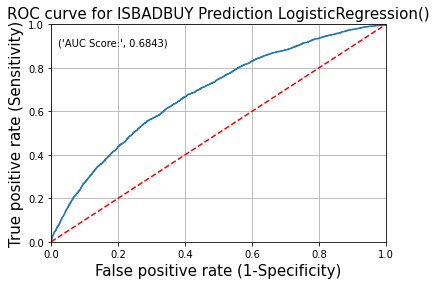

In [97]:
plot_roc(log_model,Xtest)

In [98]:
scores = calc_model_scores(logreg, Xtest, ytest)
update_scorecard('Logistic Regression without Balancing the Weights', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684


## Logistic Regression by Balancing the weights

In [99]:
logreg1 = LogisticRegression(class_weight = 'balanced') # threshold value improvement
log_model = logreg1.fit(Xtrain, ytrain)
ypred_train = log_model.predict(Xtrain)
ypred_test = log_model.predict(Xtest)
acc_train_log = round(logreg1.score(Xtrain, ytrain), 3)
acc_test_log = round(logreg1.score(Xtest, ytest), 3)
roc_test_log = round(roc_auc_score(ytest, log_model.predict_proba(Xtest)[:, 1]),3)
print('logistic regression balanced train  accurary: ',acc_train_log)
print('logistic regression balanced test accurary: ',acc_test_log)

logistic regression balanced train  accurary:  0.642
logistic regression balanced test accurary:  0.637


In [100]:
print('confusion matrix for Logistic Regression balanced train: ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Logistic Regression  balanced test: ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Logistic Regression balanced train:  
 [[28798 16026]
 [ 2264  4000]]
confusion matrix for Logistic Regression  balanced test:  
 [[12251  6932]
 [ 1018  1694]]


In [101]:
print('classification report for Logistic Regression balanced train: ','\n',classification_report(ytrain,ypred_train))
print('classification report for Logistic Regression balanced test: ','\n',classification_report(ytest,ypred_test))

classification report for Logistic Regression balanced train:  
               precision    recall  f1-score   support

           0       0.93      0.64      0.76     44824
           1       0.20      0.64      0.30      6264

    accuracy                           0.64     51088
   macro avg       0.56      0.64      0.53     51088
weighted avg       0.84      0.64      0.70     51088

classification report for Logistic Regression balanced test:  
               precision    recall  f1-score   support

           0       0.92      0.64      0.76     19183
           1       0.20      0.62      0.30      2712

    accuracy                           0.64     21895
   macro avg       0.56      0.63      0.53     21895
weighted avg       0.83      0.64      0.70     21895



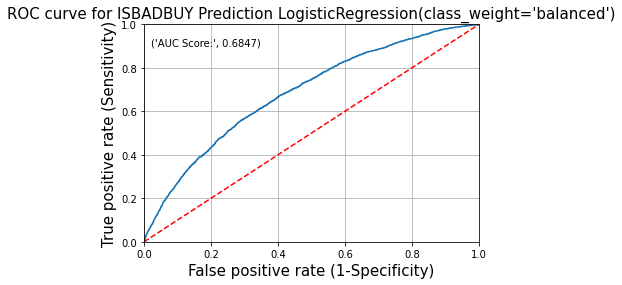

In [102]:
plot_roc(log_model,Xtest)

In [103]:
scores = calc_model_scores(logreg1, Xtest, ytest)
update_scorecard('Logistic Regression by Balancing the Weights', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685


## Tuned Logistic Regression

In [104]:
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]}

GS_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=5)
GS_lr.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10]},
             scoring='recall')

In [105]:
GS_lr.best_params_

{'C': 5}

In [106]:
# fit a new logistic model with the best parameters

lr_tuned = LogisticRegression(C=5,class_weight = 'balanced')
lr_model = lr_tuned.fit(Xtrain, ytrain)


In [107]:
ypred_train = lr_model.predict(Xtrain)
ypred_test = lr_model.predict(Xtest)
acc_train_log = round(lr_tuned.score(Xtrain, ytrain), 3)
acc_test_log = round(lr_tuned.score(Xtest, ytest), 3)
roc_test_log = round(roc_auc_score(ytest, lr_tuned.predict_proba(Xtest)[:, 1]),3)
print('logistic regression tuned train accurary: ',acc_train_log)
print('logistic regression tuned test accurary: ',acc_test_log)

logistic regression tuned train accurary:  0.642
logistic regression tuned test accurary:  0.636


In [108]:
scores = calc_model_scores(lr_tuned, Xtest, ytest)
update_scorecard('Logistic Regression, C=5 and class weight balanced', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685


In [109]:
print('confusion matrix for Logistic Regression tuned train: ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Logistic Regression tuned test: ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Logistic Regression tuned train:  
 [[28826 15998]
 [ 2274  3990]]
confusion matrix for Logistic Regression tuned test:  
 [[12244  6939]
 [ 1021  1691]]


## KNN base Classifier

In [110]:
knn = KNeighborsClassifier()
knn_b = knn.fit(Xtrain, ytrain)
ypred_train = knn_b.predict(Xtrain)
ypred_test = knn_b.predict(Xtest)
acc_train_knn = round(knn.score(Xtrain, ytrain), 3)
acc_test_knn = round(knn.score(Xtest, ytest), 3)
roc_test_knn = round(roc_auc_score(ytest, knn_b.predict_proba(Xtest)[:, 1]),3)
print('KNN train accurary: ',acc_train_knn)
print('KNN test accurary: ',acc_test_knn)
print('KNN test ROC: ',roc_test_knn)

KNN train accurary:  0.887
KNN test accurary:  0.863
KNN test ROC:  0.583


In [111]:
print('confusion matrix for KNN train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for KNN test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for KNN train :  
 [[44316   508]
 [ 5280   984]]
confusion matrix for KNN test :  
 [[18732   451]
 [ 2553   159]]


In [112]:
print('classification report for KNN train: ','\n',classification_report(ytrain,ypred_train))
print('classification report for KNN test: ','\n',classification_report(ytest,ypred_test))

classification report for KNN train:  
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     44824
           1       0.66      0.16      0.25      6264

    accuracy                           0.89     51088
   macro avg       0.78      0.57      0.60     51088
weighted avg       0.86      0.89      0.85     51088

classification report for KNN test:  
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     19183
           1       0.26      0.06      0.10      2712

    accuracy                           0.86     21895
   macro avg       0.57      0.52      0.51     21895
weighted avg       0.80      0.86      0.82     21895



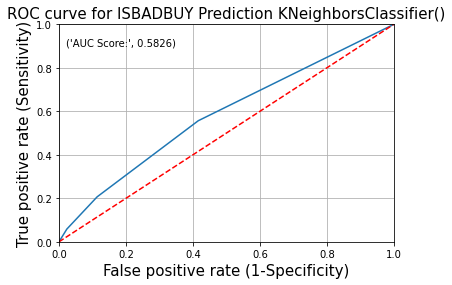

In [113]:
plot_roc(knn_b,Xtest)

In [114]:
scores = calc_model_scores(knn, Xtest, ytest)
update_scorecard('knn Classifier base Model', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583


## KNN Tuned with optimum K value

In [115]:
error_rate = []
for i in range(2,10):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

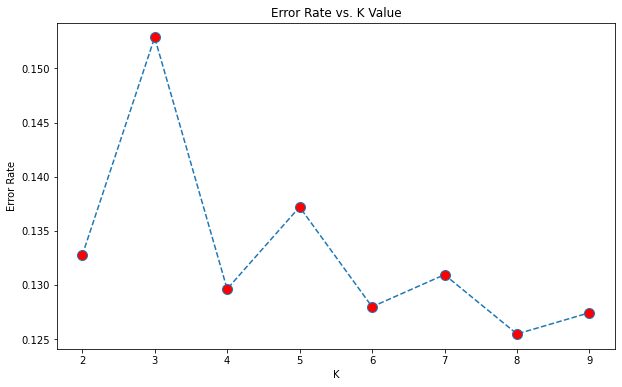

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate, linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [117]:
knn = KNeighborsClassifier(weights = 'distance',n_neighbors = 8)
knn_m = knn.fit(Xtrain, ytrain)
ypred_train = knn_m.predict(Xtrain)
ypred_test = knn_m.predict(Xtest)
acc_train_knn = round(knn.score(Xtrain, ytrain), 3)
acc_test_knn = round(knn.score(Xtest, ytest), 3)
roc_test_knn = round(roc_auc_score(ytest, knn_m.predict_proba(Xtest)[:, 1]),3)
print('KNN tuned model train accurary: ',acc_train_knn)
print('KNN tuned model test accurary: ',acc_test_knn)
print('KNN tuned model test ROC: ',roc_test_knn)

KNN tuned model train accurary:  1.0
KNN tuned model test accurary:  0.864
KNN tuned model test ROC:  0.599


In [118]:
print('confusion matrix for KNN tuned model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for KNN tuned model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for KNN tuned model train :  
 [[44824     0]
 [    0  6264]]
confusion matrix for KNN tuned model test :  
 [[18728   455]
 [ 2524   188]]


In [119]:
print('classification report for KNN tuned model train: ','\n',classification_report(ytrain,ypred_train))
print('classification report for KNN tuned model test: ','\n',classification_report(ytest,ypred_test))

classification report for KNN tuned model train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44824
           1       1.00      1.00      1.00      6264

    accuracy                           1.00     51088
   macro avg       1.00      1.00      1.00     51088
weighted avg       1.00      1.00      1.00     51088

classification report for KNN tuned model test:  
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     19183
           1       0.29      0.07      0.11      2712

    accuracy                           0.86     21895
   macro avg       0.59      0.52      0.52     21895
weighted avg       0.81      0.86      0.83     21895



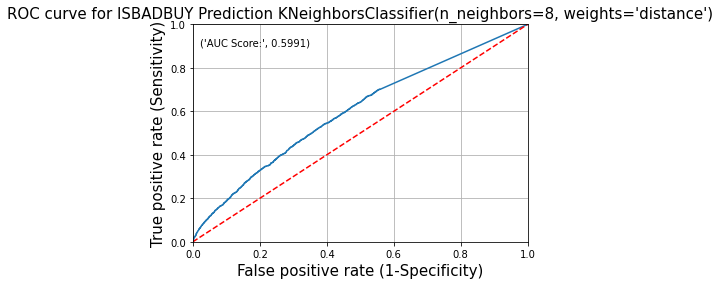

In [120]:
plot_roc(knn_m,Xtest)

In [121]:
scores = calc_model_scores(knn, Xtest, ytest)
update_scorecard('knn Classifier Tuned (n=8)', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599


## Random forest Base Model

In [122]:
random_forest = RandomForestClassifier()
rf_b = random_forest.fit(Xtrain, ytrain)
ypred_train = rf_b.predict(Xtrain)
ypred_test = rf_b.predict(Xtest)
acc_train_rf = round(random_forest.score(Xtrain, ytrain), 3)
acc_test_rf = round(random_forest.score(Xtest, ytest), 3)
roc_test_rf = round(roc_auc_score(ytest, rf_b.predict_proba(Xtest)[:, 1]),3)
print('Random Forest base model train accurary: ',acc_train_rf)
print('Random Forest base model test accurary: ',acc_test_rf)

Random Forest base model train accurary:  1.0
Random Forest base model test accurary:  0.877


In [123]:
print('confusion matrix for Random_forest base model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Random_forest base model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Random_forest base model train :  
 [[44824     0]
 [    5  6259]]
confusion matrix for Random_forest base model test :  
 [[19143    40]
 [ 2659    53]]


In [124]:
print('classification report for Random_forest base model train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Random_forest base model test : ','\n',classification_report(ytest,ypred_test))

classification report for Random_forest base model train :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44824
           1       1.00      1.00      1.00      6264

    accuracy                           1.00     51088
   macro avg       1.00      1.00      1.00     51088
weighted avg       1.00      1.00      1.00     51088

classification report for Random_forest base model test :  
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     19183
           1       0.57      0.02      0.04      2712

    accuracy                           0.88     21895
   macro avg       0.72      0.51      0.49     21895
weighted avg       0.84      0.88      0.82     21895



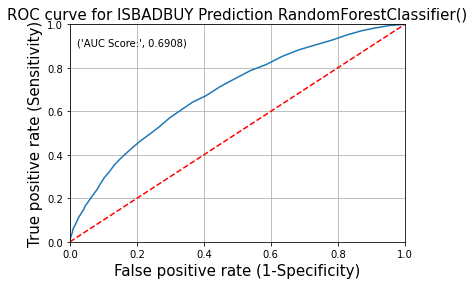

In [125]:
plot_roc(random_forest,Xtest)

In [126]:
scores = calc_model_scores(random_forest, Xtest, ytest)
update_scorecard('Random Forest Base Model', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691


## Random Forest Tuned model

In [127]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'n_estimators': [1, 2, 5], 'max_depth': [None, 10, 25, 50],
         'max_features': [ 10, 20, 30, 40]}

GS_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    scoring='recall',
                    cv=kfold,
                    n_jobs=-1, 
                    verbose=2)

GS_rf.fit(Xtrain, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 25, 50],
                         'max_features': [10, 20, 30, 40],
                         'n_estimators': [1, 2, 5]},
             scoring='recall', verbose=2)

In [128]:
GS_rf.best_params_

{'max_depth': 50, 'max_features': 40, 'n_estimators': 1}

In [129]:
rf_tuned = RandomForestClassifier(n_estimators=1, 
                                  max_depth=50, 
                                  max_features=40)

rf_t = rf_tuned.fit(Xtrain, ytrain)
ypred_train = rf_t.predict(Xtrain)
ypred_test = rf_t.predict(Xtest)
acc_train_rf = round(rf_tuned.score(Xtrain, ytrain), 3)
acc_test_rf = round(rf_tuned.score(Xtest, ytest), 3)
roc_test_rf = round(roc_auc_score(ytest, rf_t.predict_proba(Xtest)[:, 1]),3)
print('Random Forest tuned model train accurary: ',acc_train_rf)
print('Random Forest tuned model test accurary: ',acc_test_rf)

Random Forest tuned model train accurary:  0.922
Random Forest tuned model test accurary:  0.791


In [130]:
print('confusion matrix for Random_forest Tuned model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Random_forest Tuned model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Random_forest Tuned model train :  
 [[42701  2123]
 [ 1842  4422]]
confusion matrix for Random_forest Tuned model test :  
 [[16758  2425]
 [ 2156   556]]


In [131]:
print('classification report for Random_forest Tuned model train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Random_forest Tuned model test : ','\n',classification_report(ytest,ypred_test))

classification report for Random_forest Tuned model train :  
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     44824
           1       0.68      0.71      0.69      6264

    accuracy                           0.92     51088
   macro avg       0.82      0.83      0.82     51088
weighted avg       0.92      0.92      0.92     51088

classification report for Random_forest Tuned model test :  
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     19183
           1       0.19      0.21      0.20      2712

    accuracy                           0.79     21895
   macro avg       0.54      0.54      0.54     21895
weighted avg       0.80      0.79      0.79     21895



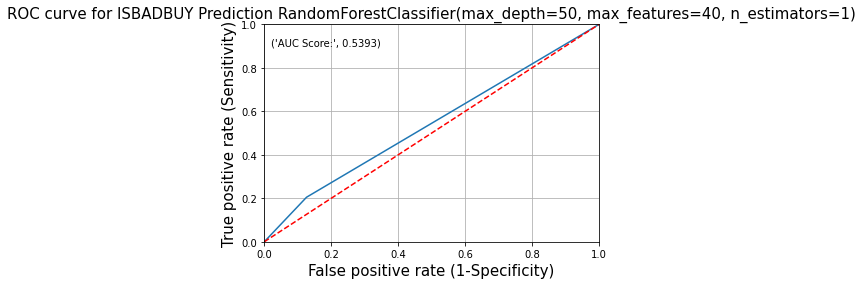

In [132]:
plot_roc(rf_tuned,Xtest)

In [133]:
scores = calc_model_scores(rf_tuned, Xtest, ytest)
update_scorecard('Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539


## Decision tree Base Model

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt  = DecisionTreeClassifier(random_state = 10)
dt_m = dt.fit(Xtrain,ytrain) 
ypred_train = dt_m.predict(Xtrain)
ypred_test = dt_m.predict(Xtest)
acc_train_dt = round(dt.score(Xtrain, ytrain), 3)
acc_test_dt = round(dt.score(Xtest, ytest), 3)
roc_test_dt = round(roc_auc_score(ytest, dt_m.predict_proba(Xtest)[:, 1]),3)
print('Decision Tree base train accurary: ',acc_train_dt)
print('Decision Tree base test accurary: ',acc_test_dt)

Decision Tree base train accurary:  1.0
Decision Tree base test accurary:  0.793


In [135]:
print('confusion matrix for Decision Tree base train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Decision Tree base test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Decision Tree base train :  
 [[44824     0]
 [    0  6264]]
confusion matrix for Decision Tree base test :  
 [[16777  2406]
 [ 2129   583]]


In [136]:
print('classification report for Decision Tree base train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Decision Tree base test : ','\n',classification_report(ytest,ypred_test))

classification report for Decision Tree base train :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44824
           1       1.00      1.00      1.00      6264

    accuracy                           1.00     51088
   macro avg       1.00      1.00      1.00     51088
weighted avg       1.00      1.00      1.00     51088

classification report for Decision Tree base test :  
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     19183
           1       0.20      0.21      0.20      2712

    accuracy                           0.79     21895
   macro avg       0.54      0.54      0.54     21895
weighted avg       0.80      0.79      0.80     21895



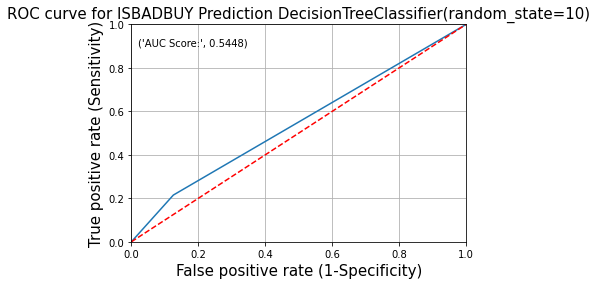

In [137]:
plot_roc(dt,Xtest)

In [138]:
scores = calc_model_scores(dt, Xtest, ytest)
update_scorecard('Decision Tree base model', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545


## Decision Tree Tuned model.

In [139]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

params = {'criterion': ['gini', 'entropy'],
          'max_depth':[None, 15, 25],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 5],
          'max_features' : [None, 10, 20]}

GS_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=params,
                    scoring='recall',
                    cv=kfold,
                    n_jobs=-1, 
                    verbose=2)

GS_dt.fit(Xtrain, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 15, 25],
                         'max_features': [None, 10, 20],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]},
             scoring='recall', verbose=2)

In [140]:
GS_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [141]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini',max_depth=None,max_features=20,class_weight = 'balanced',min_samples_leaf=1 ,min_samples_split = 2)
dt_t = dt_tuned.fit(Xtrain,ytrain)
ypred_train = dt_t.predict(Xtrain)
ypred_test = dt_t.predict(Xtest)
acc_train_dt = round(dt_tuned.score(Xtrain, ytrain), 3)
acc_test_dt = round(dt_tuned.score(Xtest, ytest), 3)
roc_test_dt = round(roc_auc_score(ytest, dt_t.predict_proba(Xtest)[:, 1]),3)
print('Decision Tree tuned model train accurary: ',acc_train_dt)
print('Decision Tree tuned model test accurary: ',acc_test_dt)

Decision Tree tuned model train accurary:  1.0
Decision Tree tuned model test accurary:  0.802


In [142]:
print('confusion matrix for Decision Tree Tuned model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Decision Tree Tuned model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Decision Tree Tuned model train :  
 [[44824     0]
 [    0  6264]]
confusion matrix for Decision Tree Tuned model test :  
 [[17059  2124]
 [ 2204   508]]


In [143]:
print('classification report for Decision Tree Tuned model train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Decision Tree Tuned model test : ','\n',classification_report(ytest,ypred_test))

classification report for Decision Tree Tuned model train :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44824
           1       1.00      1.00      1.00      6264

    accuracy                           1.00     51088
   macro avg       1.00      1.00      1.00     51088
weighted avg       1.00      1.00      1.00     51088

classification report for Decision Tree Tuned model test :  
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     19183
           1       0.19      0.19      0.19      2712

    accuracy                           0.80     21895
   macro avg       0.54      0.54      0.54     21895
weighted avg       0.80      0.80      0.80     21895



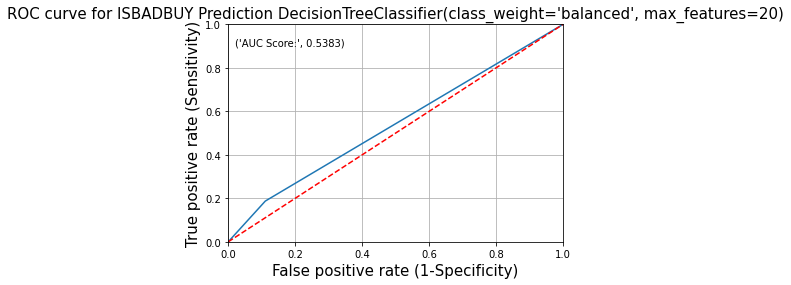

In [144]:
plot_roc(dt_tuned,Xtest)

In [145]:
scores = calc_model_scores(dt_tuned, Xtest, ytest)
update_scorecard('Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545
"Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)",0.187316,0.802329,0.077575,0.538


## Adaboost With Decision Tree Base model

In [146]:
ada_dt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_b = ada_dt.fit(Xtrain, ytrain)
ypred_train = ada_b.predict(Xtrain)
ypred_test = ada_b.predict(Xtest)
acc_train_ada = round(ada_dt.score(Xtrain, ytrain), 3)
acc_test_ada = round(ada_dt.score(Xtest, ytest), 3)
roc_test_ada = round(roc_auc_score(ytest, ada_b.predict_proba(Xtest)[:, 1]),3)
print('Ada boost with Decision Tree model train accurary: ',acc_train_ada)
print('Ada boost with Decision Tree model test accurary: ',acc_test_ada)

Ada boost with Decision Tree model train accurary:  1.0
Ada boost with Decision Tree model test accurary:  0.792


In [147]:
print('confusion matrix for Ada boost with Decision Tree model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Ada boost with Decision Tree model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Ada boost with Decision Tree model train :  
 [[44824     0]
 [    0  6264]]
confusion matrix for Ada boost with Decision Tree model test :  
 [[16742  2441]
 [ 2122   590]]


In [148]:
print('classification report for Ada boost with Decision Tree model train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Ada boost with Decision Tree model test : ','\n',classification_report(ytest,ypred_test))

classification report for Ada boost with Decision Tree model train :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44824
           1       1.00      1.00      1.00      6264

    accuracy                           1.00     51088
   macro avg       1.00      1.00      1.00     51088
weighted avg       1.00      1.00      1.00     51088

classification report for Ada boost with Decision Tree model test :  
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     19183
           1       0.19      0.22      0.21      2712

    accuracy                           0.79     21895
   macro avg       0.54      0.55      0.54     21895
weighted avg       0.80      0.79      0.80     21895



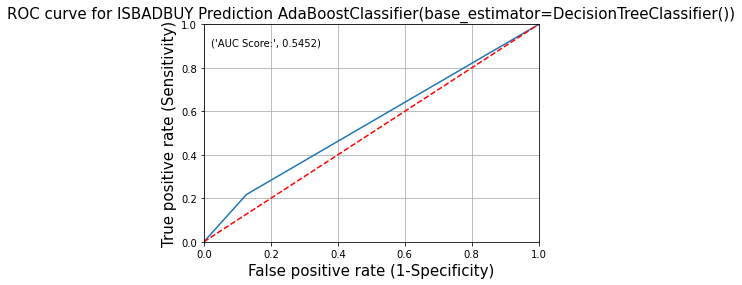

In [149]:
plot_roc(ada_dt,Xtest)

In [150]:
scores = calc_model_scores(ada_dt, Xtest, ytest)
update_scorecard('Ada boost with Decision Tree model', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545
"Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)",0.187316,0.802329,0.077575,0.538
Ada boost with Decision Tree model,0.217552,0.791596,0.085963,0.545


## Tuned Ada Boost with Decsion Tree

In [151]:
params = {'n_estimators': [1, 10, 50, 100],
         'learning_rate': [0.1, 0.5, 1, 5]}

GS_ada_dt = GridSearchCV(estimator=AdaBoostClassifier(),
                        param_grid=params,
                        scoring='recall',
                        cv=3,
                        n_jobs=-1, 
                        verbose=2)

GS_ada_dt.fit(Xtrain, ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 5],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='recall', verbose=2)

In [152]:
GS_ada_dt.best_params_

{'learning_rate': 5, 'n_estimators': 10}

In [153]:
ada_tuned = AdaBoostClassifier(learning_rate= 5,n_estimators = 10)
ada_dt_tuned = ada_tuned.fit(Xtrain, ytrain)
ypred_train = ada_dt_tuned.predict(Xtrain)
ypred_test = ada_dt_tuned.predict(Xtest)
acc_train_ada = round(ada_dt.score(Xtrain, ytrain), 3)
acc_test_ada = round(ada_dt.score(Xtest, ytest), 3)
roc_test_ada = round(roc_auc_score(ytest, ada_dt_tuned.predict_proba(Xtest)[:, 1]),3)
print('Ada boost with Decision Tree model train accurary: ',acc_train_ada)
print('Ada boost with Decision Tree model test accurary: ',acc_test_ada)

Ada boost with Decision Tree model train accurary:  1.0
Ada boost with Decision Tree model test accurary:  0.792


In [154]:
print('confusion matrix for Ada boost with Decision Tree Tuned model train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for Ada boost with Decision Tree Tuned model test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for Ada boost with Decision Tree Tuned model train :  
 [[    0 44824]
 [    0  6264]]
confusion matrix for Ada boost with Decision Tree Tuned model test :  
 [[    0 19183]
 [    0  2712]]


In [155]:
print('classification report for Ada boost with Decision Tree Tuned model train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for Ada boost with Decision Tree Tuned model test : ','\n',classification_report(ytest,ypred_test))

classification report for Ada boost with Decision Tree Tuned model train :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     44824
           1       0.12      1.00      0.22      6264

    accuracy                           0.12     51088
   macro avg       0.06      0.50      0.11     51088
weighted avg       0.02      0.12      0.03     51088

classification report for Ada boost with Decision Tree Tuned model test :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     19183
           1       0.12      1.00      0.22      2712

    accuracy                           0.12     21895
   macro avg       0.06      0.50      0.11     21895
weighted avg       0.02      0.12      0.03     21895



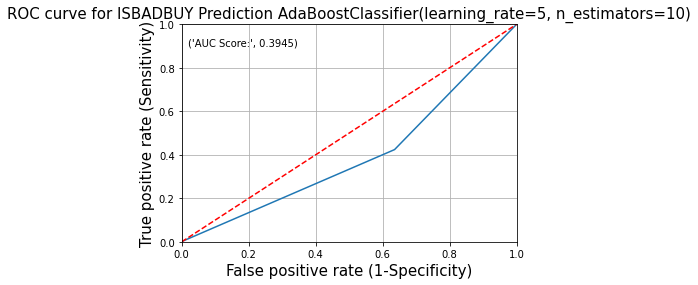

In [156]:
plot_roc(ada_tuned,Xtest)

In [157]:
scores = calc_model_scores(ada_tuned, Xtest, ytest)
update_scorecard('Ada boost with Decision Tree Tuned model(learning_rate= 5,n_estimators = 10)', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545
"Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)",0.187316,0.802329,0.077575,0.538
Ada boost with Decision Tree model,0.217552,0.791596,0.085963,0.545


# LightGBM Base Model

In [158]:
lgbm = LGBMClassifier()
lgbm_m = lgbm.fit(Xtrain, ytrain)
ypred_train = lgbm_m.predict(Xtrain)
ypred_test = lgbm_m.predict(Xtest)
acc_train_lgbm = round(lgbm.score(Xtrain, ytrain), 3)
acc_test_lgbm = round(lgbm.score(Xtest, ytest), 3)
roc_test_lgbm = round(roc_auc_score(ytest, lgbm_m.predict_proba(Xtest)[:, 1]),3)
print('LGBM train accurary: ',acc_train_lgbm)
print('LGBM test accurary: ',acc_test_lgbm)

LGBM train accurary:  0.881
LGBM test accurary:  0.877


In [159]:
print('confusion matrix for LGBM train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for LGBM test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for LGBM train :  
 [[44798    26]
 [ 6028   236]]
confusion matrix for LGBM test :  
 [[19155    28]
 [ 2673    39]]


In [160]:
print('classification report for LGBM train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for LGBM test: ','\n',classification_report(ytest,ypred_test))

classification report for LGBM train :  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     44824
           1       0.90      0.04      0.07      6264

    accuracy                           0.88     51088
   macro avg       0.89      0.52      0.50     51088
weighted avg       0.88      0.88      0.83     51088

classification report for LGBM test:  
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     19183
           1       0.58      0.01      0.03      2712

    accuracy                           0.88     21895
   macro avg       0.73      0.51      0.48     21895
weighted avg       0.84      0.88      0.82     21895



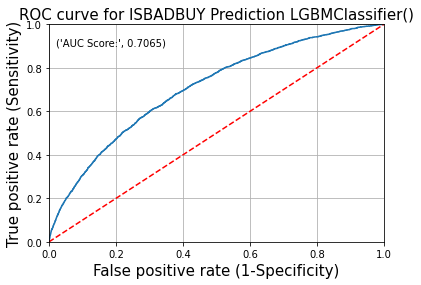

In [161]:
plot_roc(lgbm_m,Xtest)

In [162]:
scores = calc_model_scores(lgbm, Xtest, ytest)
update_scorecard('LGBM Base Classifier', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545
"Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)",0.187316,0.802329,0.077575,0.538
Ada boost with Decision Tree model,0.217552,0.791596,0.085963,0.545


##LightGBM Tuned Model

In [163]:
lgbm_tuned = LGBMClassifier(class_weight='balanced',learning_rate=0.09,max_depth=-5)
lgbm_t = lgbm_tuned.fit(Xtrain, ytrain)
ypred_train = lgbm_t.predict(Xtrain)
ypred_test = lgbm_t.predict(Xtest)
acc_train_lgbm = round(lgbm_tuned.score(Xtrain, ytrain), 3)
acc_test_lgbm = round(lgbm_tuned.score(Xtest, ytest), 3)
roc_test_lgbm = round(roc_auc_score(ytest, lgbm_t.predict_proba(Xtest)[:, 1]),3)
print('LGBM Tuned train accurary: ',acc_train_lgbm)
print('LGBM Tuned test accurary: ',acc_test_lgbm)


LGBM Tuned train accurary:  0.711
LGBM Tuned test accurary:  0.676


In [164]:
print('confusion matrix for LGBM Tuned train : ','\n',confusion_matrix(ytrain,ypred_train))
print('confusion matrix for LGBM Tuned test : ','\n',confusion_matrix(ytest,ypred_test))

confusion matrix for LGBM Tuned train :  
 [[31562 13262]
 [ 1515  4749]]
confusion matrix for LGBM Tuned test :  
 [[13148  6035]
 [ 1049  1663]]


In [165]:
print('classification report for LGBM Tuned train : ','\n',classification_report(ytrain,ypred_train))
print('classification report for LGBM Tuned test: ','\n',classification_report(ytest,ypred_test))

classification report for LGBM Tuned train :  
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     44824
           1       0.26      0.76      0.39      6264

    accuracy                           0.71     51088
   macro avg       0.61      0.73      0.60     51088
weighted avg       0.87      0.71      0.76     51088

classification report for LGBM Tuned test:  
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     19183
           1       0.22      0.61      0.32      2712

    accuracy                           0.68     21895
   macro avg       0.57      0.65      0.55     21895
weighted avg       0.84      0.68      0.73     21895



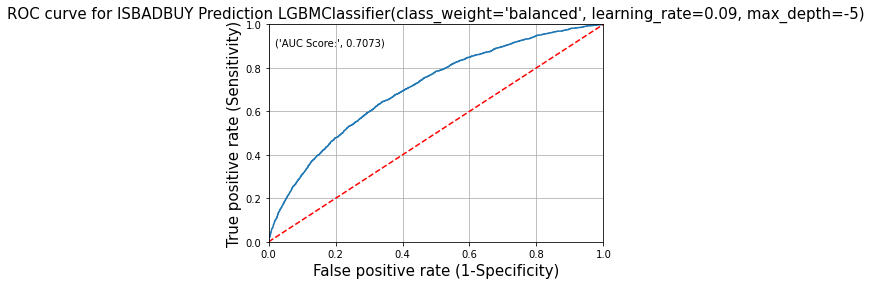

In [166]:
plot_roc(lgbm_t,Xtest)

In [167]:
scores = calc_model_scores(lgbm_tuned, Xtest, ytest)
update_scorecard('LGBM tuned Classifier(learning_rate=0.09,max_depth=-5)', scores)
model_scorecard

,recall,accuracy,cohen_kappa,roc_score
Logistic Regression without Balancing the Weights,0.001475,0.875999,0.001939,0.684
Logistic Regression by Balancing the Weights,0.624631,0.636903,0.135973,0.685
"Logistic Regression, C=5 and class weight balanced",0.623525,0.636447,0.135169,0.685
knn Classifier base Model,0.058628,0.862800,0.052631,0.583
knn Classifier Tuned (n=8),0.069322,0.863942,0.067813,0.599
Random Forest Base Model,0.019543,0.876730,0.029821,0.691
"Random Forest Tuned Model (max_depth=50,max_features=40,n_estimators=1",0.205015,0.790774,0.075390,0.539
Decision Tree base model,0.214971,0.792875,0.085785,0.545
"Decision Tree Tuned Model ((criterion = gini,max_features=20,min_samples_leaf=1 ,min_samples_split = 2)",0.187316,0.802329,0.077575,0.538
Ada boost with Decision Tree model,0.217552,0.791596,0.085963,0.545


## SMOTE 

In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [95]:
smote=SMOTE(sampling_strategy=0.70,random_state=90)

X_sm,y_sm=smote.fit_sample(Xtrain,ytrain)

In [96]:
print('y values before smote' ,Counter(ytrain))
print('y values after smote' ,Counter(y_sm))

y values before smote Counter({0: 44824, 1: 6264})
y values after smote Counter({0: 44824, 1: 31376})


In [97]:
y_sm.value_counts(normalize=True)*100

0    58.824147
1    41.175853
Name: IsBadBuy_1, dtype: float64

In [98]:
# Here the ratio of target is now improved from 12:88 to 40:60

In [ ]:
# Here we can use X_sm adn y_sm as training data set.Now it has a balanced values of zeros and one.